### Sentiment Scores for Reviews

In [198]:
import pandas as pd
import numpy as np
import import_ipynb
import data_acquisition
import feature_engineering
import pickle
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
tqdm.pandas()

#### 1. Reading Datasets

In [3]:
text_review= data_acquisition.get_ratings_data()
ratings=pd.read_pickle("./data/ratings_feature_set.pkl")

100%|██████████| 6685900/6685900 [00:51<00:00, 130886.56it/s]


In [193]:
text_review=text_review[['review_id','text']]
ratings=ratings.merge(text_review, on='review_id',how='inner')
ratings_filtered=ratings[['review_id','user_id','business_id','text','rating']]
ratings_filtered.head(10)

,review_id,user_id,business_id,text,rating
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,Total bill for this horrible service? Over $8G...,1.0
1,oy8f3bxyl7zZJFDQ5edtIA,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,6 plus hours in the ER on a Tuesday Morning gr...,1.0
2,8F9500ycq3mvpjf0glbFFg,tH0uKD-vNwMoEc3Xk3Cbdg,ujmEBvifdJM6h6RLv4wQIg,Nursing staff is ok. I'm still a bit leary ab...,3.0
3,qH-fr3sCKO0WoryJy44SGQ,renPzRDqMZpMaHiCD_e1_A,ujmEBvifdJM6h6RLv4wQIg,"A week ago, I had a robotic surgery at Mountai...",5.0
4,SnDqhw1IsB34BW1J1Er4mw,renPzRDqMZpMaHiCD_e1_A,ujmEBvifdJM6h6RLv4wQIg,"I've been to a few hospitals over the years, a...",4.0
5,_2_WR2PZHWt_N5IhkjFWbw,QJI9OSEn6ujRCtrX06vs1w,ujmEBvifdJM6h6RLv4wQIg,My Mom spent a couple of days in this hospital...,4.0
6,jxjvu8zMuIIItx7r49EE4A,m-BZLIIh5PCAKnzH0qj_0Q,ujmEBvifdJM6h6RLv4wQIg,I came here for an outpatient test procedure. ...,3.0
7,h_-p8Fs8Kf9dGKFnySVxpA,Fv0e9RIV9jw5TX3ctA1WbA,ujmEBvifdJM6h6RLv4wQIg,I had to get my man to a Hospital and this one...,2.0
8,tRxXnnmVNeriXw6JgfeqhA,k4M43lXJuQMpQW65DTqzIQ,ujmEBvifdJM6h6RLv4wQIg,Review for the 5th floor in general. I think ...,4.0
9,8Edv5pKe5lOBoN5UZTUI1w,RBXSJA372ilErzNwz0jXvQ,ujmEBvifdJM6h6RLv4wQIg,My family has used this ER four times in the p...,4.0


#### 2. Data Preprocessing 

In [194]:
#Convert to lowercase
ratings_filtered['text']=ratings_filtered['text'].str.lower()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### 3. Sentiment Scoring using Vader library

In [206]:
#Using pre-trained Vader for sentiment score

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

ratings_filtered['sentiment_score']=ratings_filtered['text'].progress_apply(lambda x:sentiment_analyzer_scores(x))




  0%|          | 0/959309 [00:00<?, ?it/s]

  0%|          | 5/959309 [00:00<6:18:32, 42.24it/s]

  0%|          | 23/959309 [00:00<4:54:21, 54.32it/s]

  0%|          | 46/959309 [00:00<3:47:25, 70.30it/s]

  0%|          | 79/959309 [00:00<2:57:45, 89.94it/s]

  0%|          | 100/959309 [00:00<2:31:29, 105.53it/s]

  0%|          | 122/959309 [00:00<2:14:00, 119.30it/s]

  0%|          | 146/959309 [00:00<1:53:47, 140.48it/s]

  0%|          | 209/959309 [00:00<1:28:00, 181.62it/s]

  0%|          | 240/959309 [00:01<1:21:41, 195.67it/s]

  0%|          | 279/959309 [00:01<1:09:46, 229.10it/s]

  0%|          | 319/959309 [00:01<1:01:09, 261.32it/s]

  0%|          | 357/959309 [00:01<56:26, 283.17it/s]  

  0%|          | 407/959309 [00:01<50:17, 317.82it/s]

  0%|          | 458/959309 [00:01<44:42, 357.49it/s]

  0%|          | 500/959309 [00:01<45:28, 351.39it/s]

  0%|          | 541/959309 [00:01<43:46, 365.06it/s]

  0%|          | 585/959309 [00:01<41:54, 381.31it/s]

  0%

  1%|          | 11659/959309 [00:30<1:11:34, 220.69it/s]

  1%|          | 11687/959309 [00:30<1:07:02, 235.61it/s]

  1%|          | 11712/959309 [00:30<1:09:39, 226.73it/s]

  1%|          | 11736/959309 [00:30<1:14:19, 212.46it/s]

  1%|          | 11762/959309 [00:30<1:10:30, 223.95it/s]

  1%|          | 11789/959309 [00:30<1:07:05, 235.40it/s]

  1%|          | 11814/959309 [00:30<1:13:47, 214.01it/s]

  1%|          | 11837/959309 [00:31<1:16:17, 206.98it/s]

  1%|          | 11862/959309 [00:31<1:12:55, 216.54it/s]

  1%|          | 11885/959309 [00:31<1:22:44, 190.83it/s]

  1%|          | 11921/959309 [00:31<1:12:45, 217.00it/s]

  1%|          | 11946/959309 [00:31<1:10:01, 225.48it/s]

  1%|          | 11973/959309 [00:31<1:07:56, 232.37it/s]

  1%|▏         | 12003/959309 [00:31<1:03:59, 246.71it/s]

  1%|▏         | 12040/959309 [00:31<57:38, 273.92it/s]  

  1%|▏         | 12074/959309 [00:31<54:54, 287.54it/s]

  1%|▏         | 12109/959309 [00:32<52:24, 301.26it/s]

 

  2%|▏         | 23297/959309 [01:00<25:49, 604.02it/s]

  2%|▏         | 23366/959309 [01:01<24:57, 624.80it/s]

  2%|▏         | 23430/959309 [01:01<26:05, 597.92it/s]

  2%|▏         | 23491/959309 [01:01<31:04, 501.91it/s]

  2%|▏         | 23545/959309 [01:01<32:53, 474.07it/s]

  2%|▏         | 23595/959309 [01:01<33:16, 468.71it/s]

  2%|▏         | 23644/959309 [01:01<33:52, 460.24it/s]

  2%|▏         | 23703/959309 [01:01<31:50, 489.64it/s]

  2%|▏         | 23777/959309 [01:01<28:38, 544.39it/s]

  2%|▏         | 23835/959309 [01:02<30:00, 519.66it/s]

  2%|▏         | 23907/959309 [01:02<27:31, 566.51it/s]

  2%|▏         | 23980/959309 [01:02<25:51, 602.73it/s]

  3%|▎         | 24043/959309 [01:02<39:24, 395.54it/s]

  3%|▎         | 24094/959309 [01:02<43:50, 355.52it/s]

  3%|▎         | 24139/959309 [01:02<44:31, 350.05it/s]

  3%|▎         | 24192/959309 [01:02<40:12, 387.64it/s]

  3%|▎         | 24241/959309 [01:03<37:49, 412.04it/s]

  3%|▎         | 24287/959309 [

  3%|▎         | 32789/959309 [01:32<59:35, 259.11it/s]

  3%|▎         | 32834/959309 [01:32<52:06, 296.34it/s]

  3%|▎         | 32867/959309 [01:32<54:16, 284.46it/s]

  3%|▎         | 32902/959309 [01:32<51:44, 298.43it/s]

  3%|▎         | 32934/959309 [01:32<51:03, 302.35it/s]

  3%|▎         | 32975/959309 [01:33<47:04, 327.92it/s]

  3%|▎         | 33019/959309 [01:33<43:30, 354.82it/s]

  3%|▎         | 33057/959309 [01:33<43:53, 351.77it/s]

  3%|▎         | 33094/959309 [01:33<48:21, 319.22it/s]

  3%|▎         | 33133/959309 [01:33<46:09, 334.40it/s]

  3%|▎         | 33168/959309 [01:33<45:58, 335.69it/s]

  3%|▎         | 33208/959309 [01:33<43:52, 351.74it/s]

  3%|▎         | 33244/959309 [01:33<50:09, 307.68it/s]

  3%|▎         | 33279/959309 [01:33<48:22, 319.07it/s]

  3%|▎         | 33316/959309 [01:34<47:28, 325.10it/s]

  3%|▎         | 33350/959309 [01:34<47:23, 325.62it/s]

  3%|▎         | 33391/959309 [01:34<44:34, 346.24it/s]

  3%|▎         | 33427/959309 [

  5%|▍         | 43887/959309 [02:04<45:30, 335.25it/s]

  5%|▍         | 43928/959309 [02:04<43:03, 354.37it/s]

  5%|▍         | 43979/959309 [02:04<39:40, 384.48it/s]

  5%|▍         | 44020/959309 [02:04<43:09, 353.43it/s]

  5%|▍         | 44058/959309 [02:04<45:40, 333.92it/s]

  5%|▍         | 44123/959309 [02:04<39:04, 390.38it/s]

  5%|▍         | 44167/959309 [02:04<37:53, 402.53it/s]

  5%|▍         | 44211/959309 [02:04<42:03, 362.58it/s]

  5%|▍         | 44252/959309 [02:04<40:51, 373.23it/s]

  5%|▍         | 44294/959309 [02:05<39:47, 383.26it/s]

  5%|▍         | 44334/959309 [02:05<44:20, 343.94it/s]

  5%|▍         | 44371/959309 [02:05<44:27, 343.03it/s]

  5%|▍         | 44407/959309 [02:05<48:53, 311.88it/s]

  5%|▍         | 44441/959309 [02:05<47:44, 319.36it/s]

  5%|▍         | 44475/959309 [02:05<50:20, 302.92it/s]

  5%|▍         | 44518/959309 [02:05<45:53, 332.19it/s]

  5%|▍         | 44559/959309 [02:05<43:32, 350.19it/s]

  5%|▍         | 44596/959309 [

  6%|▌         | 54373/959309 [02:35<51:06, 295.07it/s]

  6%|▌         | 54414/959309 [02:35<47:14, 319.24it/s]

  6%|▌         | 54452/959309 [02:35<45:00, 335.12it/s]

  6%|▌         | 54494/959309 [02:35<42:22, 355.84it/s]

  6%|▌         | 54539/959309 [02:35<39:48, 378.74it/s]

  6%|▌         | 54597/959309 [02:35<36:20, 414.82it/s]

  6%|▌         | 54667/959309 [02:35<31:56, 472.10it/s]

  6%|▌         | 54736/959309 [02:35<28:57, 520.69it/s]

  6%|▌         | 54793/959309 [02:35<31:07, 484.27it/s]

  6%|▌         | 54846/959309 [02:36<37:54, 397.64it/s]

  6%|▌         | 54891/959309 [02:36<39:47, 378.74it/s]

  6%|▌         | 54938/959309 [02:36<37:33, 401.40it/s]

  6%|▌         | 54982/959309 [02:36<43:29, 346.51it/s]

  6%|▌         | 55021/959309 [02:36<44:06, 341.68it/s]

  6%|▌         | 55063/959309 [02:36<41:47, 360.65it/s]

  6%|▌         | 55108/959309 [02:36<41:07, 366.38it/s]

  6%|▌         | 55147/959309 [02:36<42:04, 358.15it/s]

  6%|▌         | 55188/959309 [

  7%|▋         | 65724/959309 [03:05<39:46, 374.40it/s]

  7%|▋         | 65768/959309 [03:05<39:12, 379.77it/s]

  7%|▋         | 65814/959309 [03:06<37:36, 395.96it/s]

  7%|▋         | 65855/959309 [03:06<38:46, 383.97it/s]

  7%|▋         | 65895/959309 [03:06<39:51, 373.52it/s]

  7%|▋         | 65940/959309 [03:06<38:23, 387.85it/s]

  7%|▋         | 65985/959309 [03:06<36:53, 403.63it/s]

  7%|▋         | 66029/959309 [03:06<36:07, 412.10it/s]

  7%|▋         | 66077/959309 [03:06<34:40, 429.27it/s]

  7%|▋         | 66133/959309 [03:06<32:27, 458.63it/s]

  7%|▋         | 66191/959309 [03:06<30:28, 488.45it/s]

  7%|▋         | 66242/959309 [03:07<33:59, 437.89it/s]

  7%|▋         | 66288/959309 [03:07<34:17, 434.11it/s]

  7%|▋         | 66333/959309 [03:07<35:10, 423.07it/s]

  7%|▋         | 66385/959309 [03:07<33:20, 446.43it/s]

  7%|▋         | 66445/959309 [03:07<30:53, 481.84it/s]

  7%|▋         | 66495/959309 [03:07<31:08, 477.87it/s]

  7%|▋         | 66544/959309 [

  8%|▊         | 76573/959309 [03:38<1:47:11, 137.25it/s]

  8%|▊         | 76591/959309 [03:38<1:45:53, 138.94it/s]

  8%|▊         | 76608/959309 [03:38<1:45:09, 139.91it/s]

  8%|▊         | 76630/959309 [03:38<1:36:13, 152.88it/s]

  8%|▊         | 76660/959309 [03:38<1:23:57, 175.20it/s]

  8%|▊         | 76680/959309 [03:39<1:27:18, 168.50it/s]

  8%|▊         | 76700/959309 [03:39<1:25:54, 171.22it/s]

  8%|▊         | 76727/959309 [03:39<1:20:20, 183.07it/s]

  8%|▊         | 76748/959309 [03:39<1:23:57, 175.20it/s]

  8%|▊         | 76779/959309 [03:39<1:13:26, 200.27it/s]

  8%|▊         | 76801/959309 [03:39<1:16:35, 192.04it/s]

  8%|▊         | 76822/959309 [03:39<1:22:00, 179.34it/s]

  8%|▊         | 76850/959309 [03:39<1:13:10, 200.99it/s]

  8%|▊         | 76882/959309 [03:39<1:06:18, 221.81it/s]

  8%|▊         | 76909/959309 [03:40<1:03:21, 232.10it/s]

  8%|▊         | 76943/959309 [03:40<1:00:43, 242.16it/s]

  8%|▊         | 76969/959309 [03:40<1:02:03, 236.99it/s

  9%|▉         | 86757/959309 [04:10<51:59, 279.72it/s]

  9%|▉         | 86789/959309 [04:10<50:13, 289.56it/s]

  9%|▉         | 86826/959309 [04:10<47:01, 309.18it/s]

  9%|▉         | 86861/959309 [04:10<45:27, 319.88it/s]

  9%|▉         | 86901/959309 [04:10<43:40, 332.87it/s]

  9%|▉         | 86939/959309 [04:10<42:25, 342.71it/s]

  9%|▉         | 86978/959309 [04:10<40:53, 355.61it/s]

  9%|▉         | 87015/959309 [04:10<46:55, 309.81it/s]

  9%|▉         | 87048/959309 [04:11<51:27, 282.51it/s]

  9%|▉         | 87115/959309 [04:11<42:34, 341.43it/s]

  9%|▉         | 87171/959309 [04:11<37:37, 386.39it/s]

  9%|▉         | 87223/959309 [04:11<34:47, 417.70it/s]

  9%|▉         | 87288/959309 [04:11<31:20, 463.71it/s]

  9%|▉         | 87340/959309 [04:11<36:55, 393.61it/s]

  9%|▉         | 87385/959309 [04:11<37:53, 383.44it/s]

  9%|▉         | 87428/959309 [04:11<40:24, 359.61it/s]

  9%|▉         | 87468/959309 [04:12<42:58, 338.17it/s]

  9%|▉         | 87505/959309 [

 10%|█         | 97201/959309 [04:41<31:43, 452.81it/s]

 10%|█         | 97260/959309 [04:41<29:46, 482.52it/s]

 10%|█         | 97319/959309 [04:41<28:16, 508.12it/s]

 10%|█         | 97406/959309 [04:41<25:09, 571.05it/s]

 10%|█         | 97467/959309 [04:41<38:20, 374.66it/s]

 10%|█         | 97516/959309 [04:42<51:56, 276.50it/s]

 10%|█         | 97556/959309 [04:42<1:04:28, 222.74it/s]

 10%|█         | 97589/959309 [04:42<1:05:32, 219.14it/s]

 10%|█         | 97618/959309 [04:42<1:07:33, 212.57it/s]

 10%|█         | 97645/959309 [04:42<1:10:45, 202.96it/s]

 10%|█         | 97679/959309 [04:43<1:05:32, 219.08it/s]

 10%|█         | 97704/959309 [04:43<1:08:02, 211.06it/s]

 10%|█         | 97732/959309 [04:43<1:03:31, 226.07it/s]

 10%|█         | 97757/959309 [04:43<1:05:30, 219.20it/s]

 10%|█         | 97791/959309 [04:43<59:54, 239.71it/s]  

 10%|█         | 97832/959309 [04:43<52:40, 272.58it/s]

 10%|█         | 97862/959309 [04:43<58:21, 246.03it/s]

 10%|█       

 11%|█         | 106588/959309 [05:13<20:29, 693.70it/s]

 11%|█         | 106695/959309 [05:13<18:19, 775.43it/s]

 11%|█         | 106791/959309 [05:13<17:25, 815.67it/s]

 11%|█         | 106885/959309 [05:13<16:49, 844.10it/s]

 11%|█         | 106974/959309 [05:13<29:27, 482.17it/s]

 11%|█         | 107043/959309 [05:13<38:38, 367.53it/s]

 11%|█         | 107099/959309 [05:14<39:22, 360.65it/s]

 11%|█         | 107149/959309 [05:14<41:19, 343.63it/s]

 11%|█         | 107194/959309 [05:14<38:40, 367.17it/s]

 11%|█         | 107239/959309 [05:14<36:49, 385.62it/s]

 11%|█         | 107283/959309 [05:14<36:13, 391.93it/s]

 11%|█         | 107349/959309 [05:14<31:54, 445.11it/s]

 11%|█         | 107399/959309 [05:14<31:46, 446.90it/s]

 11%|█         | 107448/959309 [05:15<45:28, 312.21it/s]

 11%|█         | 107488/959309 [05:15<54:08, 262.23it/s]

 11%|█         | 107522/959309 [05:15<50:43, 279.84it/s]

 11%|█         | 107556/959309 [05:15<50:30, 281.01it/s]

 11%|█        

 12%|█▏        | 119447/959309 [05:44<22:06, 633.05it/s]

 12%|█▏        | 119515/959309 [05:44<28:49, 485.67it/s]

 12%|█▏        | 119574/959309 [05:44<27:48, 503.19it/s]

 12%|█▏        | 119631/959309 [05:44<30:21, 460.89it/s]

 12%|█▏        | 119682/959309 [05:44<30:17, 461.86it/s]

 12%|█▏        | 119733/959309 [05:45<30:12, 463.13it/s]

 12%|█▏        | 119782/959309 [05:45<34:13, 408.88it/s]

 12%|█▏        | 119826/959309 [05:45<41:15, 339.08it/s]

 12%|█▏        | 119864/959309 [05:45<42:00, 333.02it/s]

 12%|█▏        | 119901/959309 [05:45<42:25, 329.73it/s]

 13%|█▎        | 119952/959309 [05:45<38:21, 364.69it/s]

 13%|█▎        | 119991/959309 [05:45<38:57, 359.10it/s]

 13%|█▎        | 120040/959309 [05:45<35:50, 390.25it/s]

 13%|█▎        | 120082/959309 [05:46<35:18, 396.15it/s]

 13%|█▎        | 120137/959309 [05:46<32:26, 431.06it/s]

 13%|█▎        | 120195/959309 [05:46<31:28, 444.40it/s]

 13%|█▎        | 120253/959309 [05:46<29:16, 477.68it/s]

 13%|█▎       

 14%|█▎        | 129983/959309 [06:16<1:23:39, 165.21it/s]

 14%|█▎        | 130004/959309 [06:17<1:24:13, 164.11it/s]

 14%|█▎        | 130031/959309 [06:17<1:15:01, 184.23it/s]

 14%|█▎        | 130062/959309 [06:17<1:07:42, 204.12it/s]

 14%|█▎        | 130085/959309 [06:17<1:05:55, 209.65it/s]

 14%|█▎        | 130121/959309 [06:17<58:41, 235.47it/s]  

 14%|█▎        | 130147/959309 [06:17<57:06, 242.00it/s]

 14%|█▎        | 130173/959309 [06:17<57:35, 239.96it/s]

 14%|█▎        | 130198/959309 [06:17<1:08:44, 201.00it/s]

 14%|█▎        | 130224/959309 [06:17<1:04:50, 213.08it/s]

 14%|█▎        | 130258/959309 [06:18<57:35, 239.93it/s]  

 14%|█▎        | 130300/959309 [06:18<50:12, 275.15it/s]

 14%|█▎        | 130331/959309 [06:18<59:15, 233.14it/s]

 14%|█▎        | 130385/959309 [06:18<49:13, 280.65it/s]

 14%|█▎        | 130431/959309 [06:18<44:26, 310.91it/s]

 14%|█▎        | 130473/959309 [06:18<41:02, 336.54it/s]

 14%|█▎        | 130535/959309 [06:18<35:35, 388.06it/

 15%|█▍        | 142991/959309 [06:47<22:48, 596.29it/s]

 15%|█▍        | 143058/959309 [06:48<32:13, 422.15it/s]

 15%|█▍        | 143113/959309 [06:48<34:40, 392.35it/s]

 15%|█▍        | 143162/959309 [06:48<36:32, 372.18it/s]

 15%|█▍        | 143206/959309 [06:48<35:48, 379.79it/s]

 15%|█▍        | 143252/959309 [06:48<34:05, 399.02it/s]

 15%|█▍        | 143316/959309 [06:48<30:17, 448.89it/s]

 15%|█▍        | 143374/959309 [06:48<28:15, 481.25it/s]

 15%|█▍        | 143426/959309 [06:48<32:39, 416.37it/s]

 15%|█▍        | 143472/959309 [06:49<37:50, 359.33it/s]

 15%|█▍        | 143513/959309 [06:49<42:56, 316.68it/s]

 15%|█▍        | 143549/959309 [06:49<41:40, 326.28it/s]

 15%|█▍        | 143585/959309 [06:49<40:49, 333.00it/s]

 15%|█▍        | 143621/959309 [06:49<43:56, 309.36it/s]

 15%|█▍        | 143654/959309 [06:49<44:34, 304.99it/s]

 15%|█▍        | 143707/959309 [06:49<38:54, 349.39it/s]

 15%|█▍        | 143748/959309 [06:49<37:11, 365.41it/s]

 15%|█▍       

 16%|█▌        | 155852/959309 [07:19<1:16:12, 175.72it/s]

 16%|█▌        | 155882/959309 [07:19<1:12:44, 184.07it/s]

 16%|█▋        | 155915/959309 [07:19<1:03:17, 211.53it/s]

 16%|█▋        | 155945/959309 [07:19<57:58, 230.97it/s]  

 16%|█▋        | 156000/959309 [07:19<47:56, 279.31it/s]

 16%|█▋        | 156054/959309 [07:20<41:06, 325.68it/s]

 16%|█▋        | 156111/959309 [07:20<35:53, 372.89it/s]

 16%|█▋        | 156156/959309 [07:20<41:50, 319.88it/s]

 16%|█▋        | 156195/959309 [07:20<44:24, 301.36it/s]

 16%|█▋        | 156231/959309 [07:20<48:05, 278.33it/s]

 16%|█▋        | 156263/959309 [07:20<47:25, 282.17it/s]

 16%|█▋        | 156294/959309 [07:20<47:40, 280.68it/s]

 16%|█▋        | 156324/959309 [07:20<47:51, 279.68it/s]

 16%|█▋        | 156360/959309 [07:21<45:01, 297.18it/s]

 16%|█▋        | 156413/959309 [07:21<39:05, 342.25it/s]

 16%|█▋        | 156451/959309 [07:21<38:15, 349.81it/s]

 16%|█▋        | 156492/959309 [07:21<36:42, 364.51it/s]

 16%|█

 17%|█▋        | 167218/959309 [07:50<38:54, 339.27it/s]

 17%|█▋        | 167262/959309 [07:50<36:17, 363.81it/s]

 17%|█▋        | 167300/959309 [07:51<38:18, 344.58it/s]

 17%|█▋        | 167343/959309 [07:51<36:02, 366.28it/s]

 17%|█▋        | 167402/959309 [07:51<31:56, 413.23it/s]

 17%|█▋        | 167447/959309 [07:51<34:23, 383.76it/s]

 17%|█▋        | 167488/959309 [07:51<38:26, 343.28it/s]

 17%|█▋        | 167531/959309 [07:51<36:07, 365.23it/s]

 17%|█▋        | 167599/959309 [07:51<31:07, 423.96it/s]

 17%|█▋        | 167647/959309 [07:51<35:01, 376.66it/s]

 17%|█▋        | 167690/959309 [07:52<36:27, 361.90it/s]

 17%|█▋        | 167730/959309 [07:52<36:54, 357.49it/s]

 17%|█▋        | 167769/959309 [07:52<36:15, 363.80it/s]

 17%|█▋        | 167822/959309 [07:52<33:23, 394.97it/s]

 17%|█▋        | 167868/959309 [07:52<32:29, 405.88it/s]

 18%|█▊        | 167912/959309 [07:52<32:20, 407.75it/s]

 18%|█▊        | 167954/959309 [07:52<43:19, 304.40it/s]

 18%|█▊       

 19%|█▊        | 178420/959309 [08:23<38:21, 339.27it/s]

 19%|█▊        | 178456/959309 [08:23<42:35, 305.52it/s]

 19%|█▊        | 178494/959309 [08:23<40:17, 323.02it/s]

 19%|█▊        | 178542/959309 [08:23<36:29, 356.60it/s]

 19%|█▊        | 178580/959309 [08:23<35:55, 362.25it/s]

 19%|█▊        | 178632/959309 [08:23<32:51, 396.08it/s]

 19%|█▊        | 178688/959309 [08:23<31:00, 419.57it/s]

 19%|█▊        | 178732/959309 [08:23<38:24, 338.72it/s]

 19%|█▊        | 178770/959309 [08:24<40:08, 324.11it/s]

 19%|█▊        | 178822/959309 [08:24<36:06, 360.30it/s]

 19%|█▊        | 178895/959309 [08:24<30:37, 424.69it/s]

 19%|█▊        | 178957/959309 [08:24<27:51, 466.84it/s]

 19%|█▊        | 179010/959309 [08:24<28:26, 457.31it/s]

 19%|█▊        | 179061/959309 [08:24<31:49, 408.52it/s]

 19%|█▊        | 179106/959309 [08:24<43:33, 298.47it/s]

 19%|█▊        | 179143/959309 [08:24<41:13, 315.36it/s]

 19%|█▊        | 179183/959309 [08:25<38:42, 335.95it/s]

 19%|█▊       

 20%|█▉        | 190101/959309 [08:54<27:21, 468.71it/s]

 20%|█▉        | 190156/959309 [08:55<26:10, 489.74it/s]

 20%|█▉        | 190209/959309 [08:55<29:18, 437.35it/s]

 20%|█▉        | 190278/959309 [08:55<26:19, 486.84it/s]

 20%|█▉        | 190332/959309 [08:55<26:25, 484.94it/s]

 20%|█▉        | 190404/959309 [08:55<23:50, 537.52it/s]

 20%|█▉        | 190462/959309 [08:55<23:37, 542.30it/s]

 20%|█▉        | 190519/959309 [08:55<29:57, 427.67it/s]

 20%|█▉        | 190568/959309 [08:55<31:53, 401.66it/s]

 20%|█▉        | 190613/959309 [08:56<31:03, 412.55it/s]

 20%|█▉        | 190658/959309 [08:56<30:30, 419.88it/s]

 20%|█▉        | 190703/959309 [08:56<31:59, 400.46it/s]

 20%|█▉        | 190765/959309 [08:56<28:41, 446.46it/s]

 20%|█▉        | 190844/959309 [08:56<25:04, 510.93it/s]

 20%|█▉        | 190920/959309 [08:56<22:39, 565.16it/s]

 20%|█▉        | 190983/959309 [08:56<22:11, 576.93it/s]

 20%|█▉        | 191045/959309 [08:56<30:43, 416.63it/s]

 20%|█▉       

 21%|██        | 202466/959309 [09:25<34:54, 361.39it/s]

 21%|██        | 202506/959309 [09:25<35:45, 352.67it/s]

 21%|██        | 202549/959309 [09:25<34:02, 370.43it/s]

 21%|██        | 202588/959309 [09:25<34:17, 367.72it/s]

 21%|██        | 202650/959309 [09:26<30:14, 417.11it/s]

 21%|██        | 202715/959309 [09:26<26:58, 467.33it/s]

 21%|██        | 202785/959309 [09:26<24:37, 511.95it/s]

 21%|██        | 202842/959309 [09:26<23:54, 527.25it/s]

 21%|██        | 202925/959309 [09:26<21:19, 591.10it/s]

 21%|██        | 202989/959309 [09:26<25:20, 497.48it/s]

 21%|██        | 203045/959309 [09:26<27:29, 458.37it/s]

 21%|██        | 203096/959309 [09:26<27:31, 457.96it/s]

 21%|██        | 203146/959309 [09:26<27:00, 466.57it/s]

 21%|██        | 203195/959309 [09:27<26:49, 469.80it/s]

 21%|██        | 203249/959309 [09:27<25:53, 486.75it/s]

 21%|██        | 203299/959309 [09:27<28:22, 443.94it/s]

 21%|██        | 203371/959309 [09:27<25:20, 497.14it/s]

 21%|██       

 23%|██▎       | 216293/959309 [09:56<34:24, 359.88it/s]

 23%|██▎       | 216341/959309 [09:57<31:58, 387.21it/s]

 23%|██▎       | 216391/959309 [09:57<29:59, 412.84it/s]

 23%|██▎       | 216451/959309 [09:57<27:26, 451.22it/s]

 23%|██▎       | 216502/959309 [09:57<26:48, 461.89it/s]

 23%|██▎       | 216550/959309 [09:57<26:36, 465.32it/s]

 23%|██▎       | 216598/959309 [09:57<28:17, 437.43it/s]

 23%|██▎       | 216653/959309 [09:57<26:42, 463.33it/s]

 23%|██▎       | 216701/959309 [09:57<27:48, 445.18it/s]

 23%|██▎       | 216789/959309 [09:57<24:13, 510.96it/s]

 23%|██▎       | 216874/959309 [09:58<21:23, 578.37it/s]

 23%|██▎       | 216938/959309 [09:58<20:50, 593.66it/s]

 23%|██▎       | 217002/959309 [09:58<21:17, 581.13it/s]

 23%|██▎       | 217073/959309 [09:58<20:16, 610.06it/s]

 23%|██▎       | 217137/959309 [09:58<20:40, 598.40it/s]

 23%|██▎       | 217211/959309 [09:58<19:29, 634.74it/s]

 23%|██▎       | 217280/959309 [09:58<19:09, 645.34it/s]

 23%|██▎      

 24%|██▍       | 229864/959309 [10:27<22:59, 528.85it/s]

 24%|██▍       | 229929/959309 [10:28<21:43, 559.73it/s]

 24%|██▍       | 229992/959309 [10:28<21:12, 573.01it/s]

 24%|██▍       | 230051/959309 [10:28<23:14, 522.96it/s]

 24%|██▍       | 230105/959309 [10:28<26:08, 464.94it/s]

 24%|██▍       | 230179/959309 [10:28<23:15, 522.57it/s]

 24%|██▍       | 230236/959309 [10:28<26:32, 457.69it/s]

 24%|██▍       | 230292/959309 [10:28<25:41, 473.00it/s]

 24%|██▍       | 230380/959309 [10:28<22:11, 547.46it/s]

 24%|██▍       | 230442/959309 [10:29<29:21, 413.71it/s]

 24%|██▍       | 230501/959309 [10:29<26:45, 454.01it/s]

 24%|██▍       | 230555/959309 [10:29<53:09, 228.52it/s]

 24%|██▍       | 230596/959309 [10:29<52:18, 232.18it/s]

 24%|██▍       | 230632/959309 [10:30<48:48, 248.78it/s]

 24%|██▍       | 230666/959309 [10:30<48:28, 250.56it/s]

 24%|██▍       | 230698/959309 [10:30<45:23, 267.54it/s]

 24%|██▍       | 230749/959309 [10:30<39:00, 311.29it/s]

 24%|██▍      

 25%|██▌       | 242190/959309 [10:58<28:59, 412.33it/s]

 25%|██▌       | 242238/959309 [10:59<33:12, 359.83it/s]

 25%|██▌       | 242280/959309 [10:59<34:56, 342.05it/s]

 25%|██▌       | 242319/959309 [10:59<33:55, 352.22it/s]

 25%|██▌       | 242363/959309 [10:59<31:56, 374.05it/s]

 25%|██▌       | 242403/959309 [10:59<31:29, 379.40it/s]

 25%|██▌       | 242447/959309 [10:59<30:20, 393.82it/s]

 25%|██▌       | 242488/959309 [10:59<38:22, 311.34it/s]

 25%|██▌       | 242523/959309 [10:59<40:25, 295.52it/s]

 25%|██▌       | 242567/959309 [11:00<36:45, 325.01it/s]

 25%|██▌       | 242603/959309 [11:00<36:06, 330.87it/s]

 25%|██▌       | 242639/959309 [11:00<38:20, 311.58it/s]

 25%|██▌       | 242672/959309 [11:00<39:27, 302.73it/s]

 25%|██▌       | 242704/959309 [11:00<40:36, 294.05it/s]

 25%|██▌       | 242764/959309 [11:00<34:53, 342.26it/s]

 25%|██▌       | 242814/959309 [11:00<31:40, 376.96it/s]

 25%|██▌       | 242879/959309 [11:00<27:41, 431.24it/s]

 25%|██▌      

 26%|██▋       | 252440/959309 [11:29<56:12, 209.58it/s]

 26%|██▋       | 252479/959309 [11:29<48:25, 243.31it/s]

 26%|██▋       | 252511/959309 [11:29<45:58, 256.24it/s]

 26%|██▋       | 252539/959309 [11:29<46:53, 251.21it/s]

 26%|██▋       | 252566/959309 [11:29<47:38, 247.22it/s]

 26%|██▋       | 252592/959309 [11:29<48:48, 241.36it/s]

 26%|██▋       | 252623/959309 [11:29<46:16, 254.54it/s]

 26%|██▋       | 252650/959309 [11:30<46:13, 254.78it/s]

 26%|██▋       | 252676/959309 [11:30<48:32, 242.59it/s]

 26%|██▋       | 252702/959309 [11:30<47:48, 246.33it/s]

 26%|██▋       | 252727/959309 [11:30<54:13, 217.16it/s]

 26%|██▋       | 252774/959309 [11:30<45:42, 257.67it/s]

 26%|██▋       | 252804/959309 [11:30<53:36, 219.62it/s]

 26%|██▋       | 252832/959309 [11:30<50:17, 234.14it/s]

 26%|██▋       | 252859/959309 [11:30<53:32, 219.91it/s]

 26%|██▋       | 252893/959309 [11:31<50:19, 233.95it/s]

 26%|██▋       | 252926/959309 [11:31<47:45, 246.48it/s]

 26%|██▋      

 27%|██▋       | 262091/959309 [11:59<33:21, 348.29it/s]

 27%|██▋       | 262128/959309 [11:59<36:48, 315.64it/s]

 27%|██▋       | 262162/959309 [12:00<37:05, 313.21it/s]

 27%|██▋       | 262200/959309 [12:00<35:11, 330.20it/s]

 27%|██▋       | 262250/959309 [12:00<31:42, 366.37it/s]

 27%|██▋       | 262302/959309 [12:00<28:54, 401.85it/s]

 27%|██▋       | 262365/959309 [12:00<25:48, 450.16it/s]

 27%|██▋       | 262422/959309 [12:00<24:24, 475.79it/s]

 27%|██▋       | 262473/959309 [12:00<25:13, 460.32it/s]

 27%|██▋       | 262538/959309 [12:00<23:09, 501.45it/s]

 27%|██▋       | 262597/959309 [12:00<22:13, 522.40it/s]

 27%|██▋       | 262652/959309 [12:01<22:25, 517.67it/s]

 27%|██▋       | 262706/959309 [12:01<22:37, 513.11it/s]

 27%|██▋       | 262759/959309 [12:01<25:48, 449.86it/s]

 27%|██▋       | 262807/959309 [12:01<30:27, 381.06it/s]

 27%|██▋       | 262849/959309 [12:01<34:06, 340.27it/s]

 27%|██▋       | 262887/959309 [12:01<34:34, 335.66it/s]

 27%|██▋      

 28%|██▊       | 272400/959309 [12:30<27:37, 414.50it/s]

 28%|██▊       | 272444/959309 [12:30<27:33, 415.45it/s]

 28%|██▊       | 272487/959309 [12:30<28:33, 400.92it/s]

 28%|██▊       | 272533/959309 [12:30<27:55, 409.84it/s]

 28%|██▊       | 272581/959309 [12:30<26:48, 426.93it/s]

 28%|██▊       | 272634/959309 [12:30<25:16, 452.92it/s]

 28%|██▊       | 272689/959309 [12:30<23:56, 477.94it/s]

 28%|██▊       | 272738/959309 [12:30<24:34, 465.57it/s]

 28%|██▊       | 272786/959309 [12:31<24:34, 465.64it/s]

 28%|██▊       | 272874/959309 [12:31<21:06, 541.97it/s]

 28%|██▊       | 272934/959309 [12:31<22:12, 515.00it/s]

 28%|██▊       | 272990/959309 [12:31<24:56, 458.75it/s]

 28%|██▊       | 273049/959309 [12:31<23:19, 490.36it/s]

 28%|██▊       | 273102/959309 [12:31<23:16, 491.52it/s]

 28%|██▊       | 273157/959309 [12:31<22:39, 504.85it/s]

 28%|██▊       | 273227/959309 [12:31<20:54, 546.75it/s]

 28%|██▊       | 273287/959309 [12:31<20:21, 561.44it/s]

 28%|██▊      

 30%|██▉       | 284672/959309 [13:01<46:14, 243.20it/s]

 30%|██▉       | 284698/959309 [13:01<47:55, 234.60it/s]

 30%|██▉       | 284723/959309 [13:01<48:26, 232.09it/s]

 30%|██▉       | 284757/959309 [13:01<43:51, 256.35it/s]

 30%|██▉       | 284784/959309 [13:01<45:23, 247.67it/s]

 30%|██▉       | 284810/959309 [13:01<48:01, 234.08it/s]

 30%|██▉       | 284854/959309 [13:02<42:04, 267.16it/s]

 30%|██▉       | 284883/959309 [13:02<47:05, 238.72it/s]

 30%|██▉       | 284915/959309 [13:02<43:30, 258.32it/s]

 30%|██▉       | 284943/959309 [13:02<44:52, 250.44it/s]

 30%|██▉       | 284970/959309 [13:02<49:37, 226.45it/s]

 30%|██▉       | 285001/959309 [13:02<45:38, 246.19it/s]

 30%|██▉       | 285028/959309 [13:02<44:58, 249.90it/s]

 30%|██▉       | 285057/959309 [13:02<43:34, 257.87it/s]

 30%|██▉       | 285084/959309 [13:03<1:00:37, 185.36it/s]

 30%|██▉       | 285118/959309 [13:03<52:27, 214.23it/s]  

 30%|██▉       | 285155/959309 [13:03<46:43, 240.45it/s]

 30%|██▉  

 31%|███       | 293825/959309 [13:31<45:09, 245.58it/s]

 31%|███       | 293853/959309 [13:32<44:54, 247.01it/s]

 31%|███       | 293881/959309 [13:32<45:15, 245.07it/s]

 31%|███       | 293908/959309 [13:32<44:00, 252.00it/s]

 31%|███       | 293935/959309 [13:32<50:37, 219.04it/s]

 31%|███       | 293979/959309 [13:32<43:07, 257.09it/s]

 31%|███       | 294009/959309 [13:32<41:55, 264.47it/s]

 31%|███       | 294039/959309 [13:32<42:31, 260.70it/s]

 31%|███       | 294067/959309 [13:32<45:43, 242.46it/s]

 31%|███       | 294100/959309 [13:33<42:10, 262.87it/s]

 31%|███       | 294128/959309 [13:33<47:27, 233.60it/s]

 31%|███       | 294159/959309 [13:33<44:44, 247.77it/s]

 31%|███       | 294186/959309 [13:33<45:24, 244.09it/s]

 31%|███       | 294222/959309 [13:33<41:09, 269.35it/s]

 31%|███       | 294251/959309 [13:33<44:18, 250.17it/s]

 31%|███       | 294278/959309 [13:33<48:07, 230.28it/s]

 31%|███       | 294313/959309 [13:33<43:12, 256.52it/s]

 31%|███      

 32%|███▏      | 302759/959309 [14:01<49:33, 220.82it/s]

 32%|███▏      | 302782/959309 [14:02<50:13, 217.89it/s]

 32%|███▏      | 302810/959309 [14:02<47:06, 232.30it/s]

 32%|███▏      | 302837/959309 [14:02<45:31, 240.34it/s]

 32%|███▏      | 302893/959309 [14:02<37:45, 289.72it/s]

 32%|███▏      | 302973/959309 [14:02<30:32, 358.13it/s]

 32%|███▏      | 303021/959309 [14:02<28:19, 386.16it/s]

 32%|███▏      | 303069/959309 [14:02<27:52, 392.45it/s]

 32%|███▏      | 303115/959309 [14:02<27:01, 404.71it/s]

 32%|███▏      | 303160/959309 [14:02<26:52, 407.04it/s]

 32%|███▏      | 303205/959309 [14:03<26:10, 417.66it/s]

 32%|███▏      | 303255/959309 [14:03<24:57, 437.99it/s]

 32%|███▏      | 303314/959309 [14:03<23:33, 464.23it/s]

 32%|███▏      | 303363/959309 [14:03<23:12, 471.17it/s]

 32%|███▏      | 303413/959309 [14:03<22:52, 477.98it/s]

 32%|███▏      | 303462/959309 [14:03<22:45, 480.43it/s]

 32%|███▏      | 303517/959309 [14:03<22:02, 495.89it/s]

 32%|███▏     

 33%|███▎      | 312802/959309 [14:32<42:52, 251.30it/s]

 33%|███▎      | 312834/959309 [14:33<40:41, 264.76it/s]

 33%|███▎      | 312864/959309 [14:33<39:24, 273.35it/s]

 33%|███▎      | 312921/959309 [14:33<33:19, 323.23it/s]

 33%|███▎      | 312958/959309 [14:33<38:55, 276.74it/s]

 33%|███▎      | 312990/959309 [14:33<40:48, 263.92it/s]

 33%|███▎      | 313035/959309 [14:33<35:47, 300.94it/s]

 33%|███▎      | 313069/959309 [14:33<35:57, 299.52it/s]

 33%|███▎      | 313102/959309 [14:33<36:30, 295.04it/s]

 33%|███▎      | 313134/959309 [14:34<42:03, 256.02it/s]

 33%|███▎      | 313162/959309 [14:34<42:10, 255.32it/s]

 33%|███▎      | 313190/959309 [14:34<41:48, 257.60it/s]

 33%|███▎      | 313224/959309 [14:34<38:53, 276.83it/s]

 33%|███▎      | 313276/959309 [14:34<33:30, 321.27it/s]

 33%|███▎      | 313325/959309 [14:34<30:19, 355.12it/s]

 33%|███▎      | 313365/959309 [14:34<34:10, 314.97it/s]

 33%|███▎      | 313416/959309 [14:34<30:17, 355.34it/s]

 33%|███▎     

 34%|███▍      | 325161/959309 [15:04<16:17, 649.00it/s]

 34%|███▍      | 325230/959309 [15:04<16:14, 650.79it/s]

 34%|███▍      | 325298/959309 [15:04<17:34, 601.31it/s]

 34%|███▍      | 325361/959309 [15:04<24:34, 429.80it/s]

 34%|███▍      | 325413/959309 [15:04<27:43, 381.17it/s]

 34%|███▍      | 325459/959309 [15:05<31:53, 331.20it/s]

 34%|███▍      | 325499/959309 [15:05<31:15, 337.89it/s]

 34%|███▍      | 325538/959309 [15:05<37:23, 282.55it/s]

 34%|███▍      | 325571/959309 [15:05<40:19, 261.92it/s]

 34%|███▍      | 325607/959309 [15:05<37:02, 285.11it/s]

 34%|███▍      | 325663/959309 [15:05<31:40, 333.39it/s]

 34%|███▍      | 325724/959309 [15:05<27:23, 385.41it/s]

 34%|███▍      | 325770/959309 [15:06<28:47, 366.76it/s]

 34%|███▍      | 325812/959309 [15:06<27:44, 380.52it/s]

 34%|███▍      | 325874/959309 [15:06<24:35, 429.27it/s]

 34%|███▍      | 325960/959309 [15:06<21:00, 502.44it/s]

 34%|███▍      | 326026/959309 [15:06<19:33, 539.81it/s]

 34%|███▍     

 35%|███▌      | 338061/959309 [15:35<21:04, 491.37it/s]

 35%|███▌      | 338128/959309 [15:35<19:24, 533.29it/s]

 35%|███▌      | 338183/959309 [15:35<19:39, 526.73it/s]

 35%|███▌      | 338237/959309 [15:35<21:52, 473.20it/s]

 35%|███▌      | 338287/959309 [15:35<22:24, 461.96it/s]

 35%|███▌      | 338353/959309 [15:36<20:52, 495.60it/s]

 35%|███▌      | 338405/959309 [15:36<28:44, 360.13it/s]

 35%|███▌      | 338448/959309 [15:36<33:36, 307.85it/s]

 35%|███▌      | 338486/959309 [15:36<31:52, 324.65it/s]

 35%|███▌      | 338523/959309 [15:36<31:41, 326.40it/s]

 35%|███▌      | 338559/959309 [15:36<31:23, 329.50it/s]

 35%|███▌      | 338602/959309 [15:36<29:12, 354.17it/s]

 35%|███▌      | 338652/959309 [15:37<27:12, 380.19it/s]

 35%|███▌      | 338692/959309 [15:37<28:07, 367.75it/s]

 35%|███▌      | 338731/959309 [15:37<28:16, 365.78it/s]

 35%|███▌      | 338769/959309 [15:37<28:02, 368.88it/s]

 35%|███▌      | 338807/959309 [15:37<29:35, 349.51it/s]

 35%|███▌     

 37%|███▋      | 350785/959309 [16:06<22:53, 443.16it/s]

 37%|███▋      | 350832/959309 [16:06<22:49, 444.27it/s]

 37%|███▋      | 350885/959309 [16:06<22:02, 459.95it/s]

 37%|███▋      | 350947/959309 [16:06<20:23, 497.18it/s]

 37%|███▋      | 350999/959309 [16:07<22:26, 451.64it/s]

 37%|███▋      | 351062/959309 [16:07<20:32, 493.42it/s]

 37%|███▋      | 351114/959309 [16:07<20:58, 483.40it/s]

 37%|███▋      | 351165/959309 [16:07<22:54, 442.38it/s]

 37%|███▋      | 351212/959309 [16:07<28:14, 358.92it/s]

 37%|███▋      | 351252/959309 [16:07<28:34, 354.66it/s]

 37%|███▋      | 351293/959309 [16:07<27:27, 369.16it/s]

 37%|███▋      | 351342/959309 [16:07<25:30, 397.35it/s]

 37%|███▋      | 351411/959309 [16:08<22:33, 449.10it/s]

 37%|███▋      | 351460/959309 [16:08<25:07, 403.24it/s]

 37%|███▋      | 351504/959309 [16:08<25:26, 398.04it/s]

 37%|███▋      | 351552/959309 [16:08<24:13, 418.27it/s]

 37%|███▋      | 351601/959309 [16:08<23:12, 436.51it/s]

 37%|███▋     

 38%|███▊      | 364592/959309 [16:38<21:56, 451.64it/s]

 38%|███▊      | 364649/959309 [16:38<20:43, 478.12it/s]

 38%|███▊      | 364699/959309 [16:38<22:51, 433.57it/s]

 38%|███▊      | 364745/959309 [16:38<23:19, 424.70it/s]

 38%|███▊      | 364790/959309 [16:38<25:29, 388.69it/s]

 38%|███▊      | 364834/959309 [16:39<24:54, 397.83it/s]

 38%|███▊      | 364876/959309 [16:39<24:37, 402.35it/s]

 38%|███▊      | 364926/959309 [16:39<23:12, 426.87it/s]

 38%|███▊      | 364989/959309 [16:39<21:00, 471.56it/s]

 38%|███▊      | 365039/959309 [16:39<21:39, 457.33it/s]

 38%|███▊      | 365087/959309 [16:39<21:41, 456.46it/s]

 38%|███▊      | 365138/959309 [16:39<21:03, 470.33it/s]

 38%|███▊      | 365204/959309 [16:39<19:18, 512.79it/s]

 38%|███▊      | 365258/959309 [16:39<20:25, 484.78it/s]

 38%|███▊      | 365309/959309 [16:40<20:54, 473.32it/s]

 38%|███▊      | 365358/959309 [16:40<22:20, 443.08it/s]

 38%|███▊      | 365410/959309 [16:40<21:23, 462.75it/s]

 38%|███▊     

 39%|███▉      | 378481/959309 [17:09<45:50, 211.14it/s]

 39%|███▉      | 378506/959309 [17:09<43:45, 221.25it/s]

 39%|███▉      | 378541/959309 [17:09<39:05, 247.65it/s]

 39%|███▉      | 378568/959309 [17:09<38:45, 249.68it/s]

 39%|███▉      | 378596/959309 [17:09<37:39, 256.97it/s]

 39%|███▉      | 378629/959309 [17:09<35:12, 274.90it/s]

 39%|███▉      | 378670/959309 [17:09<31:53, 303.42it/s]

 39%|███▉      | 378708/959309 [17:09<32:05, 301.46it/s]

 39%|███▉      | 378740/959309 [17:10<35:51, 269.85it/s]

 39%|███▉      | 378780/959309 [17:10<32:25, 298.37it/s]

 39%|███▉      | 378825/959309 [17:10<29:14, 330.87it/s]

 39%|███▉      | 378874/959309 [17:10<26:26, 365.78it/s]

 39%|███▉      | 378914/959309 [17:10<25:54, 373.47it/s]

 40%|███▉      | 378955/959309 [17:10<25:19, 381.92it/s]

 40%|███▉      | 379000/959309 [17:10<24:35, 393.37it/s]

 40%|███▉      | 379044/959309 [17:10<23:59, 403.02it/s]

 40%|███▉      | 379096/959309 [17:10<22:38, 427.11it/s]

 40%|███▉     

 41%|████      | 392622/959309 [17:40<21:51, 432.22it/s]

 41%|████      | 392700/959309 [17:40<18:58, 497.77it/s]

 41%|████      | 392756/959309 [17:41<21:10, 445.80it/s]

 41%|████      | 392806/959309 [17:41<25:29, 370.48it/s]

 41%|████      | 392849/959309 [17:41<26:55, 350.66it/s]

 41%|████      | 392889/959309 [17:41<28:06, 335.87it/s]

 41%|████      | 392926/959309 [17:41<27:25, 344.27it/s]

 41%|████      | 392967/959309 [17:41<26:14, 359.59it/s]

 41%|████      | 393009/959309 [17:41<25:09, 375.18it/s]

 41%|████      | 393060/959309 [17:41<23:38, 399.13it/s]

 41%|████      | 393107/959309 [17:42<22:37, 417.16it/s]

 41%|████      | 393154/959309 [17:42<21:54, 430.66it/s]

 41%|████      | 393213/959309 [17:42<20:13, 466.44it/s]

 41%|████      | 393262/959309 [17:42<20:48, 453.25it/s]

 41%|████      | 393314/959309 [17:42<20:06, 469.16it/s]

 41%|████      | 393362/959309 [17:42<22:18, 422.93it/s]

 41%|████      | 393406/959309 [17:42<23:04, 408.76it/s]

 41%|████     

 42%|████▏     | 405391/959309 [18:11<22:35, 408.66it/s]

 42%|████▏     | 405445/959309 [18:11<21:05, 437.60it/s]

 42%|████▏     | 405492/959309 [18:12<25:14, 365.77it/s]

 42%|████▏     | 405533/959309 [18:12<25:09, 366.86it/s]

 42%|████▏     | 405593/959309 [18:12<22:15, 414.67it/s]

 42%|████▏     | 405639/959309 [18:12<21:39, 426.20it/s]

 42%|████▏     | 405685/959309 [18:12<21:17, 433.38it/s]

 42%|████▏     | 405746/959309 [18:12<20:10, 457.22it/s]

 42%|████▏     | 405798/959309 [18:12<19:29, 473.41it/s]

 42%|████▏     | 405851/959309 [18:12<18:53, 488.39it/s]

 42%|████▏     | 405923/959309 [18:12<17:04, 540.13it/s]

 42%|████▏     | 405980/959309 [18:13<16:56, 544.36it/s]

 42%|████▏     | 406037/959309 [18:13<17:16, 534.05it/s]

 42%|████▏     | 406092/959309 [18:13<24:20, 378.82it/s]

 42%|████▏     | 406138/959309 [18:13<25:53, 356.19it/s]

 42%|████▏     | 406195/959309 [18:13<23:02, 400.08it/s]

 42%|████▏     | 406241/959309 [18:13<28:33, 322.81it/s]

 42%|████▏    

 44%|████▎     | 419155/959309 [18:42<18:49, 478.24it/s]

 44%|████▎     | 419223/959309 [18:42<17:11, 523.35it/s]

 44%|████▎     | 419291/959309 [18:42<16:07, 557.88it/s]

 44%|████▎     | 419350/959309 [18:42<16:27, 546.80it/s]

 44%|████▎     | 419407/959309 [18:42<17:15, 521.26it/s]

 44%|████▎     | 419475/959309 [18:42<16:03, 560.41it/s]

 44%|████▎     | 419537/959309 [18:42<15:36, 576.60it/s]

 44%|████▎     | 419597/959309 [18:42<15:45, 570.63it/s]

 44%|████▎     | 419681/959309 [18:43<14:15, 630.69it/s]

 44%|████▍     | 419758/959309 [18:43<13:30, 665.56it/s]

 44%|████▍     | 419827/959309 [18:43<14:52, 604.64it/s]

 44%|████▍     | 419891/959309 [18:43<14:56, 601.94it/s]

 44%|████▍     | 419962/959309 [18:43<14:15, 630.47it/s]

 44%|████▍     | 420027/959309 [18:43<16:22, 549.04it/s]

 44%|████▍     | 420085/959309 [18:43<16:57, 529.84it/s]

 44%|████▍     | 420141/959309 [18:43<17:39, 508.76it/s]

 44%|████▍     | 420195/959309 [18:44<17:43, 506.92it/s]

 44%|████▍    

 45%|████▌     | 433267/959309 [19:12<21:25, 409.31it/s]

 45%|████▌     | 433311/959309 [19:13<21:18, 411.48it/s]

 45%|████▌     | 433355/959309 [19:13<20:53, 419.59it/s]

 45%|████▌     | 433399/959309 [19:13<21:48, 401.93it/s]

 45%|████▌     | 433444/959309 [19:13<21:13, 412.83it/s]

 45%|████▌     | 433498/959309 [19:13<20:24, 429.50it/s]

 45%|████▌     | 433553/959309 [19:13<19:30, 449.17it/s]

 45%|████▌     | 433602/959309 [19:13<19:05, 459.04it/s]

 45%|████▌     | 433668/959309 [19:13<17:23, 503.93it/s]

 45%|████▌     | 433721/959309 [19:13<18:30, 473.19it/s]

 45%|████▌     | 433770/959309 [19:14<20:12, 433.58it/s]

 45%|████▌     | 433825/959309 [19:14<18:58, 461.55it/s]

 45%|████▌     | 433894/959309 [19:14<17:09, 510.15it/s]

 45%|████▌     | 433955/959309 [19:14<16:21, 535.53it/s]

 45%|████▌     | 434017/959309 [19:14<15:44, 555.96it/s]

 45%|████▌     | 434097/959309 [19:14<14:19, 611.01it/s]

 45%|████▌     | 434162/959309 [19:14<14:39, 596.80it/s]

 45%|████▌    

 47%|████▋     | 447252/959309 [19:43<16:55, 504.10it/s]

 47%|████▋     | 447313/959309 [19:43<16:11, 527.22it/s]

 47%|████▋     | 447385/959309 [19:43<15:10, 562.03it/s]

 47%|████▋     | 447445/959309 [19:44<15:08, 563.11it/s]

 47%|████▋     | 447521/959309 [19:44<13:59, 609.97it/s]

 47%|████▋     | 447585/959309 [19:44<14:13, 599.86it/s]

 47%|████▋     | 447647/959309 [19:44<14:45, 577.99it/s]

 47%|████▋     | 447707/959309 [19:44<15:04, 565.87it/s]

 47%|████▋     | 447784/959309 [19:44<13:52, 614.35it/s]

 47%|████▋     | 447848/959309 [19:44<14:52, 573.00it/s]

 47%|████▋     | 447909/959309 [19:44<15:04, 565.13it/s]

 47%|████▋     | 447967/959309 [19:44<15:52, 536.64it/s]

 47%|████▋     | 448022/959309 [19:45<16:47, 507.43it/s]

 47%|████▋     | 448080/959309 [19:45<16:12, 525.42it/s]

 47%|████▋     | 448146/959309 [19:45<15:14, 559.24it/s]

 47%|████▋     | 448204/959309 [19:45<19:45, 431.02it/s]

 47%|████▋     | 448253/959309 [19:45<21:08, 402.78it/s]

 47%|████▋    

 48%|████▊     | 459428/959309 [20:15<29:08, 285.93it/s]

 48%|████▊     | 459465/959309 [20:15<27:16, 305.52it/s]

 48%|████▊     | 459497/959309 [20:15<29:42, 280.45it/s]

 48%|████▊     | 459539/959309 [20:16<27:01, 308.29it/s]

 48%|████▊     | 459572/959309 [20:16<27:08, 306.88it/s]

 48%|████▊     | 459612/959309 [20:16<25:34, 325.69it/s]

 48%|████▊     | 459651/959309 [20:16<24:33, 339.15it/s]

 48%|████▊     | 459686/959309 [20:16<26:45, 311.29it/s]

 48%|████▊     | 459725/959309 [20:16<25:32, 325.96it/s]

 48%|████▊     | 459759/959309 [20:16<27:51, 298.88it/s]

 48%|████▊     | 459802/959309 [20:16<25:42, 323.80it/s]

 48%|████▊     | 459839/959309 [20:16<24:53, 334.41it/s]

 48%|████▊     | 459892/959309 [20:17<24:05, 345.54it/s]

 48%|████▊     | 459929/959309 [20:17<23:37, 352.37it/s]

 48%|████▊     | 459965/959309 [20:17<24:37, 338.04it/s]

 48%|████▊     | 460001/959309 [20:17<24:35, 338.46it/s]

 48%|████▊     | 460039/959309 [20:17<24:08, 344.69it/s]

 48%|████▊    

 49%|████▉     | 473892/959309 [20:46<14:05, 574.45it/s]

 49%|████▉     | 473951/959309 [20:46<14:20, 564.27it/s]

 49%|████▉     | 474009/959309 [20:46<14:27, 559.32it/s]

 49%|████▉     | 474067/959309 [20:47<14:22, 562.48it/s]

 49%|████▉     | 474124/959309 [20:47<16:51, 479.43it/s]

 49%|████▉     | 474175/959309 [20:47<18:13, 443.80it/s]

 49%|████▉     | 474235/959309 [20:47<16:50, 479.98it/s]

 49%|████▉     | 474287/959309 [20:47<16:35, 487.20it/s]

 49%|████▉     | 474349/959309 [20:47<15:32, 520.01it/s]

 49%|████▉     | 474403/959309 [20:47<15:33, 519.63it/s]

 49%|████▉     | 474457/959309 [20:47<18:55, 427.01it/s]

 49%|████▉     | 474507/959309 [20:47<18:11, 444.09it/s]

 49%|████▉     | 474573/959309 [20:48<16:33, 487.81it/s]

 49%|████▉     | 474634/959309 [20:48<15:35, 517.86it/s]

 49%|████▉     | 474708/959309 [20:48<14:33, 554.55it/s]

 49%|████▉     | 474770/959309 [20:48<14:37, 552.00it/s]

 49%|████▉     | 474829/959309 [20:48<14:23, 561.30it/s]

 50%|████▉    

 51%|█████     | 486829/959309 [21:17<23:47, 331.01it/s]

 51%|█████     | 486864/959309 [21:17<23:53, 329.64it/s]

 51%|█████     | 486914/959309 [21:17<21:56, 358.78it/s]

 51%|█████     | 486960/959309 [21:17<20:58, 375.34it/s]

 51%|█████     | 486999/959309 [21:17<24:27, 321.94it/s]

 51%|█████     | 487041/959309 [21:17<22:45, 345.88it/s]

 51%|█████     | 487084/959309 [21:18<21:35, 364.62it/s]

 51%|█████     | 487123/959309 [21:18<22:54, 343.47it/s]

 51%|█████     | 487159/959309 [21:18<22:40, 347.12it/s]

 51%|█████     | 487204/959309 [21:18<21:17, 369.60it/s]

 51%|█████     | 487244/959309 [21:18<21:01, 374.19it/s]

 51%|█████     | 487284/959309 [21:18<20:46, 378.53it/s]

 51%|█████     | 487345/959309 [21:18<18:26, 426.36it/s]

 51%|█████     | 487412/959309 [21:18<16:31, 476.01it/s]

 51%|█████     | 487482/959309 [21:18<14:56, 526.02it/s]

 51%|█████     | 487566/959309 [21:19<13:16, 592.25it/s]

 51%|█████     | 487631/959309 [21:19<13:43, 572.44it/s]

 51%|█████    

 52%|█████▏    | 500470/959309 [21:48<19:31, 391.53it/s]

 52%|█████▏    | 500541/959309 [21:48<16:55, 451.94it/s]

 52%|█████▏    | 500607/959309 [21:48<15:19, 498.77it/s]

 52%|█████▏    | 500664/959309 [21:48<14:46, 517.62it/s]

 52%|█████▏    | 500730/959309 [21:48<13:50, 552.21it/s]

 52%|█████▏    | 500790/959309 [21:48<15:45, 484.87it/s]

 52%|█████▏    | 500843/959309 [21:49<20:28, 373.34it/s]

 52%|█████▏    | 500888/959309 [21:49<24:04, 317.40it/s]

 52%|█████▏    | 500927/959309 [21:49<25:42, 297.18it/s]

 52%|█████▏    | 500962/959309 [21:49<28:27, 268.51it/s]

 52%|█████▏    | 500998/959309 [21:49<26:21, 289.88it/s]

 52%|█████▏    | 501055/959309 [21:49<22:53, 333.55it/s]

 52%|█████▏    | 501093/959309 [21:50<23:49, 320.48it/s]

 52%|█████▏    | 501129/959309 [21:50<23:44, 321.71it/s]

 52%|█████▏    | 501181/959309 [21:50<21:02, 362.81it/s]

 52%|█████▏    | 501233/959309 [21:50<19:08, 398.71it/s]

 52%|█████▏    | 501282/959309 [21:50<18:11, 419.60it/s]

 52%|█████▏   

 54%|█████▎    | 514031/959309 [22:19<18:27, 402.14it/s]

 54%|█████▎    | 514091/959309 [22:19<16:39, 445.33it/s]

 54%|█████▎    | 514157/959309 [22:19<15:07, 490.64it/s]

 54%|█████▎    | 514210/959309 [22:19<15:43, 471.92it/s]

 54%|█████▎    | 514260/959309 [22:19<15:32, 477.42it/s]

 54%|█████▎    | 514330/959309 [22:20<14:19, 517.53it/s]

 54%|█████▎    | 514384/959309 [22:20<15:46, 470.02it/s]

 54%|█████▎    | 514434/959309 [22:20<17:38, 420.45it/s]

 54%|█████▎    | 514479/959309 [22:20<18:58, 390.71it/s]

 54%|█████▎    | 514521/959309 [22:20<19:38, 377.41it/s]

 54%|█████▎    | 514578/959309 [22:20<17:40, 419.51it/s]

 54%|█████▎    | 514641/959309 [22:20<15:55, 465.48it/s]

 54%|█████▎    | 514697/959309 [22:20<15:13, 486.89it/s]

 54%|█████▎    | 514749/959309 [22:21<16:30, 448.69it/s]

 54%|█████▎    | 514809/959309 [22:21<15:21, 482.54it/s]

 54%|█████▎    | 514860/959309 [22:21<16:24, 451.42it/s]

 54%|█████▎    | 514908/959309 [22:21<17:16, 428.66it/s]

 54%|█████▎   

 55%|█████▍    | 526890/959309 [22:51<32:46, 219.95it/s]

 55%|█████▍    | 526918/959309 [22:51<31:05, 231.77it/s]

 55%|█████▍    | 526943/959309 [22:51<31:31, 228.60it/s]

 55%|█████▍    | 526979/959309 [22:51<28:09, 255.94it/s]

 55%|█████▍    | 527007/959309 [22:51<27:28, 262.20it/s]

 55%|█████▍    | 527035/959309 [22:51<34:50, 206.75it/s]

 55%|█████▍    | 527066/959309 [22:51<31:37, 227.74it/s]

 55%|█████▍    | 527109/959309 [22:52<27:18, 263.78it/s]

 55%|█████▍    | 527140/959309 [22:52<27:14, 264.48it/s]

 55%|█████▍    | 527183/959309 [22:52<24:06, 298.71it/s]

 55%|█████▍    | 527222/959309 [22:52<22:33, 319.32it/s]

 55%|█████▍    | 527270/959309 [22:52<20:24, 352.71it/s]

 55%|█████▍    | 527316/959309 [22:52<19:04, 377.45it/s]

 55%|█████▍    | 527365/959309 [22:52<17:53, 402.45it/s]

 55%|█████▍    | 527419/959309 [22:52<16:37, 432.98it/s]

 55%|█████▍    | 527482/959309 [22:52<15:09, 474.94it/s]

 55%|█████▍    | 527533/959309 [22:53<19:34, 367.75it/s]

 55%|█████▍   

 56%|█████▌    | 539345/959309 [23:22<17:44, 394.69it/s]

 56%|█████▌    | 539388/959309 [23:22<23:40, 295.68it/s]

 56%|█████▌    | 539440/959309 [23:22<20:37, 339.21it/s]

 56%|█████▌    | 539486/959309 [23:22<19:12, 364.38it/s]

 56%|█████▌    | 539546/959309 [23:22<16:56, 412.93it/s]

 56%|█████▋    | 539624/959309 [23:22<14:33, 480.61it/s]

 56%|█████▋    | 539719/959309 [23:23<12:23, 564.21it/s]

 56%|█████▋    | 539787/959309 [23:23<12:04, 578.89it/s]

 56%|█████▋    | 539854/959309 [23:23<12:37, 553.48it/s]

 56%|█████▋    | 539916/959309 [23:23<12:43, 549.45it/s]

 56%|█████▋    | 539976/959309 [23:23<14:05, 495.80it/s]

 56%|█████▋    | 540030/959309 [23:23<15:01, 464.99it/s]

 56%|█████▋    | 540080/959309 [23:23<14:48, 471.62it/s]

 56%|█████▋    | 540130/959309 [23:23<16:26, 424.90it/s]

 56%|█████▋    | 540175/959309 [23:24<16:55, 412.70it/s]

 56%|█████▋    | 540219/959309 [23:24<17:24, 401.14it/s]

 56%|█████▋    | 540278/959309 [23:24<15:45, 443.02it/s]

 56%|█████▋   

 58%|█████▊    | 552874/959309 [23:53<13:44, 492.76it/s]

 58%|█████▊    | 552925/959309 [23:53<14:51, 455.88it/s]

 58%|█████▊    | 552972/959309 [23:53<15:33, 435.16it/s]

 58%|█████▊    | 553031/959309 [23:53<14:24, 469.72it/s]

 58%|█████▊    | 553080/959309 [23:54<15:51, 426.74it/s]

 58%|█████▊    | 553125/959309 [23:54<16:29, 410.40it/s]

 58%|█████▊    | 553182/959309 [23:54<15:06, 447.88it/s]

 58%|█████▊    | 553249/959309 [23:54<13:40, 494.61it/s]

 58%|█████▊    | 553331/959309 [23:54<12:04, 560.22it/s]

 58%|█████▊    | 553393/959309 [23:54<17:16, 391.79it/s]

 58%|█████▊    | 553443/959309 [23:54<17:06, 395.32it/s]

 58%|█████▊    | 553490/959309 [23:55<19:34, 345.58it/s]

 58%|█████▊    | 553552/959309 [23:55<17:05, 395.62it/s]

 58%|█████▊    | 553599/959309 [23:55<17:45, 380.73it/s]

 58%|█████▊    | 553650/959309 [23:55<16:28, 410.54it/s]

 58%|█████▊    | 553700/959309 [23:55<15:36, 433.26it/s]

 58%|█████▊    | 553751/959309 [23:55<14:54, 453.43it/s]

 58%|█████▊   

 59%|█████▉    | 567097/959309 [24:25<20:11, 323.76it/s]

 59%|█████▉    | 567142/959309 [24:25<18:55, 345.26it/s]

 59%|█████▉    | 567182/959309 [24:25<18:32, 352.36it/s]

 59%|█████▉    | 567255/959309 [24:25<15:40, 416.91it/s]

 59%|█████▉    | 567305/959309 [24:25<18:17, 357.30it/s]

 59%|█████▉    | 567348/959309 [24:25<18:00, 362.75it/s]

 59%|█████▉    | 567389/959309 [24:25<22:59, 284.14it/s]

 59%|█████▉    | 567424/959309 [24:26<26:14, 248.82it/s]

 59%|█████▉    | 567454/959309 [24:26<27:40, 235.97it/s]

 59%|█████▉    | 567482/959309 [24:26<26:23, 247.46it/s]

 59%|█████▉    | 567510/959309 [24:26<26:30, 246.31it/s]

 59%|█████▉    | 567537/959309 [24:26<29:50, 218.75it/s]

 59%|█████▉    | 567570/959309 [24:26<26:56, 242.39it/s]

 59%|█████▉    | 567602/959309 [24:26<25:01, 260.79it/s]

 59%|█████▉    | 567630/959309 [24:26<24:48, 263.07it/s]

 59%|█████▉    | 567658/959309 [24:26<24:24, 267.52it/s]

 59%|█████▉    | 567686/959309 [24:27<26:20, 247.72it/s]

 59%|█████▉   

 60%|██████    | 580146/959309 [24:56<15:13, 415.08it/s]

 60%|██████    | 580211/959309 [24:57<13:38, 463.36it/s]

 60%|██████    | 580287/959309 [24:57<12:02, 524.56it/s]

 60%|██████    | 580345/959309 [24:57<11:44, 538.28it/s]

 61%|██████    | 580403/959309 [24:57<12:55, 488.73it/s]

 61%|██████    | 580456/959309 [24:57<13:34, 465.04it/s]

 61%|██████    | 580505/959309 [24:57<14:14, 443.37it/s]

 61%|██████    | 580560/959309 [24:57<13:30, 467.57it/s]

 61%|██████    | 580609/959309 [24:57<13:35, 464.50it/s]

 61%|██████    | 580662/959309 [24:57<13:06, 481.30it/s]

 61%|██████    | 580712/959309 [24:58<13:03, 482.91it/s]

 61%|██████    | 580766/959309 [24:58<12:53, 489.19it/s]

 61%|██████    | 580836/959309 [24:58<11:46, 535.56it/s]

 61%|██████    | 580901/959309 [24:58<11:17, 558.31it/s]

 61%|██████    | 580967/959309 [24:58<10:46, 585.30it/s]

 61%|██████    | 581042/959309 [24:58<10:11, 618.65it/s]

 61%|██████    | 581106/959309 [24:58<11:32, 545.99it/s]

 61%|██████   

 62%|██████▏   | 592488/959309 [25:28<30:45, 198.80it/s]

 62%|██████▏   | 592537/959309 [25:28<25:19, 241.45it/s]

 62%|██████▏   | 592577/959309 [25:28<22:18, 273.90it/s]

 62%|██████▏   | 592616/959309 [25:28<20:19, 300.58it/s]

 62%|██████▏   | 592657/959309 [25:28<18:43, 326.31it/s]

 62%|██████▏   | 592711/959309 [25:29<16:38, 367.16it/s]

 62%|██████▏   | 592756/959309 [25:29<15:50, 385.59it/s]

 62%|██████▏   | 592799/959309 [25:29<16:24, 372.28it/s]

 62%|██████▏   | 592840/959309 [25:29<16:45, 364.33it/s]

 62%|██████▏   | 592879/959309 [25:29<17:34, 347.52it/s]

 62%|██████▏   | 592916/959309 [25:29<17:38, 346.05it/s]

 62%|██████▏   | 592957/959309 [25:29<16:52, 361.96it/s]

 62%|██████▏   | 593014/959309 [25:29<15:21, 397.45it/s]

 62%|██████▏   | 593057/959309 [25:29<15:01, 406.43it/s]

 62%|██████▏   | 593103/959309 [25:30<14:36, 417.97it/s]

 62%|██████▏   | 593146/959309 [25:30<15:04, 404.93it/s]

 62%|██████▏   | 593200/959309 [25:30<14:07, 431.79it/s]

 62%|██████▏  

 63%|██████▎   | 605659/959309 [25:59<16:38, 354.01it/s]

 63%|██████▎   | 605696/959309 [25:59<20:13, 291.29it/s]

 63%|██████▎   | 605728/959309 [25:59<25:49, 228.13it/s]

 63%|██████▎   | 605766/959309 [25:59<22:46, 258.72it/s]

 63%|██████▎   | 605797/959309 [26:00<23:41, 248.68it/s]

 63%|██████▎   | 605847/959309 [26:00<20:09, 292.31it/s]

 63%|██████▎   | 605896/959309 [26:00<17:49, 330.59it/s]

 63%|██████▎   | 605935/959309 [26:00<17:02, 345.62it/s]

 63%|██████▎   | 605995/959309 [26:00<14:52, 395.81it/s]

 63%|██████▎   | 606040/959309 [26:00<16:08, 364.80it/s]

 63%|██████▎   | 606081/959309 [26:00<15:53, 370.64it/s]

 63%|██████▎   | 606138/959309 [26:00<14:14, 413.32it/s]

 63%|██████▎   | 606194/959309 [26:00<13:29, 435.95it/s]

 63%|██████▎   | 606241/959309 [26:01<13:56, 422.20it/s]

 63%|██████▎   | 606311/959309 [26:01<12:18, 478.28it/s]

 63%|██████▎   | 606363/959309 [26:01<12:57, 453.91it/s]

 63%|██████▎   | 606412/959309 [26:01<13:07, 447.85it/s]

 63%|██████▎  

 65%|██████▍   | 619568/959309 [26:30<17:11, 329.35it/s]

 65%|██████▍   | 619605/959309 [26:31<17:30, 323.43it/s]

 65%|██████▍   | 619668/959309 [26:31<14:57, 378.37it/s]

 65%|██████▍   | 619723/959309 [26:31<13:38, 414.83it/s]

 65%|██████▍   | 619816/959309 [26:31<11:23, 496.43it/s]

 65%|██████▍   | 619879/959309 [26:31<10:41, 529.27it/s]

 65%|██████▍   | 619940/959309 [26:31<11:33, 489.42it/s]

 65%|██████▍   | 620000/959309 [26:31<10:54, 518.06it/s]

 65%|██████▍   | 620075/959309 [26:31<09:54, 570.46it/s]

 65%|██████▍   | 620143/959309 [26:31<09:33, 591.01it/s]

 65%|██████▍   | 620206/959309 [26:31<09:45, 579.10it/s]

 65%|██████▍   | 620267/959309 [26:32<10:21, 545.71it/s]

 65%|██████▍   | 620324/959309 [26:32<10:40, 529.38it/s]

 65%|██████▍   | 620379/959309 [26:32<11:37, 485.66it/s]

 65%|██████▍   | 620436/959309 [26:32<11:08, 506.86it/s]

 65%|██████▍   | 620489/959309 [26:32<11:05, 509.07it/s]

 65%|██████▍   | 620555/959309 [26:32<10:20, 546.16it/s]

 65%|██████▍  

 66%|██████▌   | 632362/959309 [27:02<10:08, 536.86it/s]

 66%|██████▌   | 632431/959309 [27:02<09:32, 570.77it/s]

 66%|██████▌   | 632491/959309 [27:02<10:18, 528.41it/s]

 66%|██████▌   | 632547/959309 [27:02<11:53, 457.73it/s]

 66%|██████▌   | 632597/959309 [27:02<13:04, 416.37it/s]

 66%|██████▌   | 632642/959309 [27:02<13:18, 409.11it/s]

 66%|██████▌   | 632697/959309 [27:03<12:19, 441.46it/s]

 66%|██████▌   | 632763/959309 [27:03<11:06, 489.71it/s]

 66%|██████▌   | 632819/959309 [27:03<10:43, 507.57it/s]

 66%|██████▌   | 632919/959309 [27:03<09:11, 592.08it/s]

 66%|██████▌   | 632986/959309 [27:03<09:06, 597.59it/s]

 66%|██████▌   | 633051/959309 [27:03<10:04, 539.96it/s]

 66%|██████▌   | 633114/959309 [27:03<09:38, 563.66it/s]

 66%|██████▌   | 633188/959309 [27:03<08:59, 604.72it/s]

 66%|██████▌   | 633252/959309 [27:03<09:32, 569.09it/s]

 66%|██████▌   | 633312/959309 [27:04<12:16, 442.91it/s]

 66%|██████▌   | 633363/959309 [27:04<13:51, 391.78it/s]

 66%|██████▌  

 67%|██████▋   | 645395/959309 [27:35<11:19, 462.05it/s]

 67%|██████▋   | 645448/959309 [27:35<11:14, 465.07it/s]

 67%|██████▋   | 645499/959309 [27:35<11:45, 445.09it/s]

 67%|██████▋   | 645550/959309 [27:35<11:23, 458.93it/s]

 67%|██████▋   | 645625/959309 [27:36<10:06, 517.31it/s]

 67%|██████▋   | 645681/959309 [27:36<10:19, 506.38it/s]

 67%|██████▋   | 645735/959309 [27:36<10:44, 486.65it/s]

 67%|██████▋   | 645786/959309 [27:36<11:25, 457.49it/s]

 67%|██████▋   | 645834/959309 [27:36<15:44, 331.98it/s]

 67%|██████▋   | 645874/959309 [27:36<18:48, 277.86it/s]

 67%|██████▋   | 645908/959309 [27:36<19:58, 261.40it/s]

 67%|██████▋   | 645939/959309 [27:37<23:45, 219.76it/s]

 67%|██████▋   | 645966/959309 [27:37<27:20, 190.97it/s]

 67%|██████▋   | 645989/959309 [27:37<26:21, 198.09it/s]

 67%|██████▋   | 646012/959309 [27:37<27:45, 188.10it/s]

 67%|██████▋   | 646033/959309 [27:37<27:49, 187.66it/s]

 67%|██████▋   | 646057/959309 [27:37<26:06, 199.96it/s]

 67%|██████▋  

 68%|██████▊   | 656871/959309 [28:07<21:35, 233.53it/s]

 68%|██████▊   | 656907/959309 [28:07<19:26, 259.35it/s]

 68%|██████▊   | 656946/959309 [28:07<17:28, 288.28it/s]

 68%|██████▊   | 656980/959309 [28:07<16:45, 300.69it/s]

 68%|██████▊   | 657028/959309 [28:07<15:25, 326.75it/s]

 68%|██████▊   | 657073/959309 [28:07<14:16, 353.04it/s]

 69%|██████▊   | 657127/959309 [28:08<12:53, 390.75it/s]

 69%|██████▊   | 657170/959309 [28:08<14:10, 355.08it/s]

 69%|██████▊   | 657209/959309 [28:08<16:23, 307.21it/s]

 69%|██████▊   | 657262/959309 [28:08<14:20, 351.12it/s]

 69%|██████▊   | 657304/959309 [28:08<13:37, 369.27it/s]

 69%|██████▊   | 657353/959309 [28:08<12:43, 395.66it/s]

 69%|██████▊   | 657396/959309 [28:08<15:54, 316.19it/s]

 69%|██████▊   | 657433/959309 [28:08<16:38, 302.25it/s]

 69%|██████▊   | 657485/959309 [28:09<14:40, 342.80it/s]

 69%|██████▊   | 657524/959309 [28:09<15:49, 317.73it/s]

 69%|██████▊   | 657569/959309 [28:09<14:29, 346.95it/s]

 69%|██████▊  

 70%|██████▉   | 669811/959309 [28:38<12:13, 394.87it/s]

 70%|██████▉   | 669861/959309 [28:38<14:04, 342.62it/s]

 70%|██████▉   | 669906/959309 [28:38<13:09, 366.59it/s]

 70%|██████▉   | 669949/959309 [28:39<13:25, 359.14it/s]

 70%|██████▉   | 669990/959309 [28:39<14:10, 340.23it/s]

 70%|██████▉   | 670065/959309 [28:39<11:51, 406.33it/s]

 70%|██████▉   | 670114/959309 [28:39<12:59, 370.83it/s]

 70%|██████▉   | 670158/959309 [28:39<19:04, 252.57it/s]

 70%|██████▉   | 670193/959309 [28:39<19:42, 244.41it/s]

 70%|██████▉   | 670231/959309 [28:40<17:36, 273.64it/s]

 70%|██████▉   | 670267/959309 [28:40<16:26, 292.94it/s]

 70%|██████▉   | 670313/959309 [28:40<14:47, 325.50it/s]

 70%|██████▉   | 670350/959309 [28:40<19:25, 247.90it/s]

 70%|██████▉   | 670381/959309 [28:40<19:51, 242.44it/s]

 70%|██████▉   | 670410/959309 [28:40<20:05, 239.68it/s]

 70%|██████▉   | 670446/959309 [28:40<18:06, 265.91it/s]

 70%|██████▉   | 670479/959309 [28:40<17:11, 280.05it/s]

 70%|██████▉  

 71%|███████   | 682045/959309 [29:11<10:07, 456.24it/s]

 71%|███████   | 682104/959309 [29:11<09:27, 488.82it/s]

 71%|███████   | 682163/959309 [29:11<08:58, 514.32it/s]

 71%|███████   | 682219/959309 [29:12<09:00, 513.05it/s]

 71%|███████   | 682273/959309 [29:12<10:24, 443.52it/s]

 71%|███████   | 682321/959309 [29:12<10:54, 423.36it/s]

 71%|███████   | 682366/959309 [29:12<11:00, 419.18it/s]

 71%|███████   | 682422/959309 [29:12<10:15, 449.65it/s]

 71%|███████   | 682469/959309 [29:12<10:50, 425.75it/s]

 71%|███████   | 682514/959309 [29:12<11:38, 396.33it/s]

 71%|███████   | 682566/959309 [29:12<10:49, 426.04it/s]

 71%|███████   | 682623/959309 [29:12<10:01, 459.87it/s]

 71%|███████   | 682671/959309 [29:13<10:04, 457.74it/s]

 71%|███████   | 682719/959309 [29:13<10:01, 459.53it/s]

 71%|███████   | 682784/959309 [29:13<09:09, 503.56it/s]

 71%|███████   | 682837/959309 [29:13<09:39, 477.44it/s]

 71%|███████   | 682887/959309 [29:13<09:51, 467.14it/s]

 71%|███████  

 73%|███████▎  | 695933/959309 [29:42<08:07, 539.96it/s]

 73%|███████▎  | 696000/959309 [29:42<07:40, 571.90it/s]

 73%|███████▎  | 696066/959309 [29:42<07:23, 593.27it/s]

 73%|███████▎  | 696127/959309 [29:42<08:12, 534.23it/s]

 73%|███████▎  | 696183/959309 [29:42<09:55, 441.83it/s]

 73%|███████▎  | 696232/959309 [29:42<09:42, 452.01it/s]

 73%|███████▎  | 696300/959309 [29:42<08:43, 502.30it/s]

 73%|███████▎  | 696359/959309 [29:42<08:25, 519.96it/s]

 73%|███████▎  | 696414/959309 [29:43<08:53, 492.78it/s]

 73%|███████▎  | 696468/959309 [29:43<08:42, 503.36it/s]

 73%|███████▎  | 696525/959309 [29:43<08:24, 521.34it/s]

 73%|███████▎  | 696584/959309 [29:43<08:09, 537.04it/s]

 73%|███████▎  | 696675/959309 [29:43<07:10, 610.55it/s]

 73%|███████▎  | 696741/959309 [29:43<07:22, 593.76it/s]

 73%|███████▎  | 696804/959309 [29:43<07:58, 548.30it/s]

 73%|███████▎  | 696871/959309 [29:43<07:32, 579.48it/s]

 73%|███████▎  | 696933/959309 [29:43<07:24, 589.65it/s]

 73%|███████▎ 

 74%|███████▍  | 711024/959309 [30:12<08:57, 461.56it/s]

 74%|███████▍  | 711083/959309 [30:12<08:23, 493.20it/s]

 74%|███████▍  | 711150/959309 [30:12<07:44, 534.10it/s]

 74%|███████▍  | 711265/959309 [30:12<06:31, 633.51it/s]

 74%|███████▍  | 711370/959309 [30:12<05:44, 718.80it/s]

 74%|███████▍  | 711453/959309 [30:12<07:05, 581.95it/s]

 74%|███████▍  | 711523/959309 [30:13<07:34, 545.04it/s]

 74%|███████▍  | 711594/959309 [30:13<07:03, 585.46it/s]

 74%|███████▍  | 711660/959309 [30:13<06:51, 601.95it/s]

 74%|███████▍  | 711726/959309 [30:13<07:31, 548.68it/s]

 74%|███████▍  | 711786/959309 [30:13<07:56, 519.84it/s]

 74%|███████▍  | 711842/959309 [30:13<08:18, 496.61it/s]

 74%|███████▍  | 711898/959309 [30:13<08:01, 513.82it/s]

 74%|███████▍  | 711952/959309 [30:13<08:14, 500.14it/s]

 74%|███████▍  | 712024/959309 [30:14<07:29, 549.95it/s]

 74%|███████▍  | 712082/959309 [30:14<07:35, 542.83it/s]

 74%|███████▍  | 712139/959309 [30:14<08:55, 461.84it/s]

 74%|███████▍ 

 76%|███████▌  | 725887/959309 [30:43<07:40, 507.23it/s]

 76%|███████▌  | 725942/959309 [30:43<07:33, 514.44it/s]

 76%|███████▌  | 725995/959309 [30:43<07:31, 516.44it/s]

 76%|███████▌  | 726048/959309 [30:43<07:53, 492.71it/s]

 76%|███████▌  | 726107/959309 [30:43<07:32, 515.88it/s]

 76%|███████▌  | 726161/959309 [30:43<07:29, 518.86it/s]

 76%|███████▌  | 726225/959309 [30:43<07:10, 541.45it/s]

 76%|███████▌  | 726280/959309 [30:44<07:10, 541.81it/s]

 76%|███████▌  | 726335/959309 [30:44<07:39, 507.35it/s]

 76%|███████▌  | 726390/959309 [30:44<07:35, 511.32it/s]

 76%|███████▌  | 726442/959309 [30:44<09:32, 407.02it/s]

 76%|███████▌  | 726491/959309 [30:44<09:04, 427.70it/s]

 76%|███████▌  | 726564/959309 [30:44<07:57, 486.99it/s]

 76%|███████▌  | 726618/959309 [30:44<10:06, 383.90it/s]

 76%|███████▌  | 726664/959309 [30:45<14:00, 276.90it/s]

 76%|███████▌  | 726701/959309 [30:45<13:20, 290.53it/s]

 76%|███████▌  | 726758/959309 [30:45<11:23, 340.39it/s]

 76%|███████▌ 

 77%|███████▋  | 738448/959309 [31:14<08:11, 449.37it/s]

 77%|███████▋  | 738496/959309 [31:14<08:21, 440.06it/s]

 77%|███████▋  | 738544/959309 [31:14<08:09, 451.25it/s]

 77%|███████▋  | 738616/959309 [31:14<07:16, 506.08it/s]

 77%|███████▋  | 738701/959309 [31:14<06:23, 574.50it/s]

 77%|███████▋  | 738765/959309 [31:14<06:12, 592.50it/s]

 77%|███████▋  | 738829/959309 [31:14<06:10, 594.86it/s]

 77%|███████▋  | 738922/959309 [31:15<05:31, 665.43it/s]

 77%|███████▋  | 738994/959309 [31:15<06:35, 557.51it/s]

 77%|███████▋  | 739056/959309 [31:15<06:36, 554.97it/s]

 77%|███████▋  | 739116/959309 [31:15<06:48, 538.97it/s]

 77%|███████▋  | 739174/959309 [31:15<06:51, 534.59it/s]

 77%|███████▋  | 739266/959309 [31:15<06:04, 603.21it/s]

 77%|███████▋  | 739331/959309 [31:15<06:21, 576.85it/s]

 77%|███████▋  | 739400/959309 [31:15<06:03, 604.30it/s]

 77%|███████▋  | 739465/959309 [31:16<05:56, 617.30it/s]

 77%|███████▋  | 739531/959309 [31:16<05:52, 623.28it/s]

 77%|███████▋ 

 78%|███████▊  | 752920/959309 [31:45<10:13, 336.20it/s]

 78%|███████▊  | 752959/959309 [31:45<11:08, 308.79it/s]

 78%|███████▊  | 753000/959309 [31:46<10:22, 331.47it/s]

 78%|███████▊  | 753040/959309 [31:46<10:05, 340.85it/s]

 79%|███████▊  | 753104/959309 [31:46<08:40, 396.16it/s]

 79%|███████▊  | 753171/959309 [31:46<07:50, 437.72it/s]

 79%|███████▊  | 753245/959309 [31:46<06:53, 498.70it/s]

 79%|███████▊  | 753315/959309 [31:46<06:18, 544.19it/s]

 79%|███████▊  | 753376/959309 [31:46<06:20, 540.52it/s]

 79%|███████▊  | 753435/959309 [31:47<10:16, 333.98it/s]

 79%|███████▊  | 753490/959309 [31:47<09:03, 378.35it/s]

 79%|███████▊  | 753552/959309 [31:47<08:01, 427.33it/s]

 79%|███████▊  | 753611/959309 [31:47<07:24, 462.27it/s]

 79%|███████▊  | 753669/959309 [31:47<06:58, 491.84it/s]

 79%|███████▊  | 753725/959309 [31:47<10:28, 326.94it/s]

 79%|███████▊  | 753770/959309 [31:47<10:54, 314.23it/s]

 79%|███████▊  | 753810/959309 [31:48<10:37, 322.47it/s]

 79%|███████▊ 

 80%|███████▉  | 767348/959309 [32:16<14:42, 217.57it/s]

 80%|███████▉  | 767378/959309 [32:16<14:11, 225.52it/s]

 80%|███████▉  | 767406/959309 [32:17<16:33, 193.21it/s]

 80%|███████▉  | 767442/959309 [32:17<14:17, 223.82it/s]

 80%|████████  | 767473/959309 [32:17<13:06, 243.89it/s]

 80%|████████  | 767519/959309 [32:17<11:16, 283.46it/s]

 80%|████████  | 767553/959309 [32:17<11:05, 287.98it/s]

 80%|████████  | 767605/959309 [32:17<09:37, 331.76it/s]

 80%|████████  | 767644/959309 [32:17<09:59, 319.94it/s]

 80%|████████  | 767691/959309 [32:17<09:02, 353.13it/s]

 80%|████████  | 767749/959309 [32:17<08:31, 374.41it/s]

 80%|████████  | 767815/959309 [32:18<07:51, 405.82it/s]

 80%|████████  | 767860/959309 [32:18<07:38, 417.67it/s]

 80%|████████  | 767904/959309 [32:18<08:28, 376.22it/s]

 80%|████████  | 767944/959309 [32:18<08:43, 365.75it/s]

 80%|████████  | 767983/959309 [32:18<09:39, 330.29it/s]

 80%|████████  | 768031/959309 [32:18<08:47, 362.57it/s]

 80%|████████ 

 82%|████████▏ | 781879/959309 [32:48<09:14, 320.16it/s]

 82%|████████▏ | 781923/959309 [32:48<08:35, 344.18it/s]

 82%|████████▏ | 781969/959309 [32:48<07:58, 370.46it/s]

 82%|████████▏ | 782023/959309 [32:48<07:16, 406.56it/s]

 82%|████████▏ | 782099/959309 [32:48<06:19, 467.02it/s]

 82%|████████▏ | 782165/959309 [32:48<05:46, 511.69it/s]

 82%|████████▏ | 782230/959309 [32:48<05:23, 546.56it/s]

 82%|████████▏ | 782305/959309 [32:49<04:57, 594.74it/s]

 82%|████████▏ | 782378/959309 [32:49<05:01, 586.19it/s]

 82%|████████▏ | 782440/959309 [32:49<05:16, 559.63it/s]

 82%|████████▏ | 782499/959309 [32:49<05:57, 494.01it/s]

 82%|████████▏ | 782552/959309 [32:49<05:52, 500.90it/s]

 82%|████████▏ | 782612/959309 [32:49<05:35, 526.56it/s]

 82%|████████▏ | 782667/959309 [32:49<06:36, 445.85it/s]

 82%|████████▏ | 782715/959309 [32:49<06:31, 451.30it/s]

 82%|████████▏ | 782782/959309 [32:50<05:54, 498.49it/s]

 82%|████████▏ | 782844/959309 [32:50<05:36, 524.06it/s]

 82%|████████▏

 83%|████████▎ | 795752/959309 [33:19<06:09, 442.23it/s]

 83%|████████▎ | 795798/959309 [33:19<07:24, 368.15it/s]

 83%|████████▎ | 795840/959309 [33:19<07:08, 381.86it/s]

 83%|████████▎ | 795895/959309 [33:19<06:31, 417.81it/s]

 83%|████████▎ | 795945/959309 [33:19<06:21, 428.62it/s]

 83%|████████▎ | 795990/959309 [33:19<06:58, 390.04it/s]

 83%|████████▎ | 796047/959309 [33:20<06:19, 430.39it/s]

 83%|████████▎ | 796113/959309 [33:20<05:44, 474.03it/s]

 83%|████████▎ | 796165/959309 [33:20<05:37, 483.19it/s]

 83%|████████▎ | 796216/959309 [33:20<06:43, 404.69it/s]

 83%|████████▎ | 796289/959309 [33:20<05:49, 466.55it/s]

 83%|████████▎ | 796342/959309 [33:20<05:58, 454.65it/s]

 83%|████████▎ | 796392/959309 [33:20<07:21, 369.28it/s]

 83%|████████▎ | 796436/959309 [33:20<07:02, 385.10it/s]

 83%|████████▎ | 796494/959309 [33:21<06:20, 427.35it/s]

 83%|████████▎ | 796542/959309 [33:21<06:13, 435.22it/s]

 83%|████████▎ | 796589/959309 [33:21<07:20, 369.58it/s]

 83%|████████▎

 84%|████████▍ | 809644/959309 [33:50<06:18, 395.73it/s]

 84%|████████▍ | 809687/959309 [33:50<07:48, 319.56it/s]

 84%|████████▍ | 809724/959309 [33:50<08:24, 296.63it/s]

 84%|████████▍ | 809757/959309 [33:50<09:19, 267.14it/s]

 84%|████████▍ | 809787/959309 [33:51<09:03, 275.16it/s]

 84%|████████▍ | 809817/959309 [33:51<08:52, 280.91it/s]

 84%|████████▍ | 809870/959309 [33:51<07:38, 326.04it/s]

 84%|████████▍ | 809930/959309 [33:51<06:36, 377.15it/s]

 84%|████████▍ | 809974/959309 [33:51<08:11, 303.73it/s]

 84%|████████▍ | 810011/959309 [33:51<07:51, 316.71it/s]

 84%|████████▍ | 810081/959309 [33:51<06:34, 378.23it/s]

 84%|████████▍ | 810147/959309 [33:51<05:47, 429.21it/s]

 84%|████████▍ | 810199/959309 [33:51<06:01, 412.00it/s]

 84%|████████▍ | 810247/959309 [33:52<06:11, 400.94it/s]

 84%|████████▍ | 810307/959309 [33:52<05:40, 437.21it/s]

 84%|████████▍ | 810371/959309 [33:52<05:09, 481.54it/s]

 84%|████████▍ | 810424/959309 [33:52<05:21, 462.72it/s]

 84%|████████▍

 86%|████████▌ | 824098/959309 [34:21<06:20, 355.81it/s]

 86%|████████▌ | 824149/959309 [34:21<05:46, 389.90it/s]

 86%|████████▌ | 824211/959309 [34:21<05:07, 438.68it/s]

 86%|████████▌ | 824263/959309 [34:21<04:57, 454.03it/s]

 86%|████████▌ | 824323/959309 [34:22<04:36, 488.95it/s]

 86%|████████▌ | 824375/959309 [34:22<05:14, 428.53it/s]

 86%|████████▌ | 824422/959309 [34:22<06:23, 352.08it/s]

 86%|████████▌ | 824464/959309 [34:22<06:26, 348.78it/s]

 86%|████████▌ | 824503/959309 [34:22<06:23, 351.56it/s]

 86%|████████▌ | 824549/959309 [34:22<05:57, 377.18it/s]

 86%|████████▌ | 824602/959309 [34:22<05:29, 409.21it/s]

 86%|████████▌ | 824671/959309 [34:22<04:48, 466.02it/s]

 86%|████████▌ | 824724/959309 [34:22<04:38, 482.80it/s]

 86%|████████▌ | 824776/959309 [34:23<04:49, 464.23it/s]

 86%|████████▌ | 824851/959309 [34:23<04:19, 518.75it/s]

 86%|████████▌ | 824907/959309 [34:23<04:38, 482.78it/s]

 86%|████████▌ | 824969/959309 [34:23<04:23, 509.65it/s]

 86%|████████▌

 87%|████████▋ | 837473/959309 [34:52<05:29, 369.71it/s]

 87%|████████▋ | 837551/959309 [34:53<04:37, 438.86it/s]

 87%|████████▋ | 837608/959309 [34:53<05:01, 403.00it/s]

 87%|████████▋ | 837658/959309 [34:53<04:55, 411.38it/s]

 87%|████████▋ | 837706/959309 [34:53<05:21, 378.22it/s]

 87%|████████▋ | 837749/959309 [34:53<05:14, 386.94it/s]

 87%|████████▋ | 837792/959309 [34:53<05:18, 382.07it/s]

 87%|████████▋ | 837848/959309 [34:53<04:49, 420.26it/s]

 87%|████████▋ | 837893/959309 [34:53<04:45, 424.57it/s]

 87%|████████▋ | 837938/959309 [34:54<05:08, 393.47it/s]

 87%|████████▋ | 837991/959309 [34:54<04:44, 425.98it/s]

 87%|████████▋ | 838036/959309 [34:54<05:13, 387.29it/s]

 87%|████████▋ | 838077/959309 [34:54<05:39, 357.08it/s]

 87%|████████▋ | 838115/959309 [34:54<06:31, 309.45it/s]

 87%|████████▋ | 838149/959309 [34:54<07:10, 281.21it/s]

 87%|████████▋ | 838180/959309 [34:54<09:31, 212.01it/s]

 87%|████████▋ | 838234/959309 [34:55<07:50, 257.12it/s]

 87%|████████▋

 89%|████████▉ | 851656/959309 [35:24<03:54, 459.54it/s]

 89%|████████▉ | 851737/959309 [35:24<03:29, 513.03it/s]

 89%|████████▉ | 851791/959309 [35:25<03:38, 493.01it/s]

 89%|████████▉ | 851862/959309 [35:25<03:18, 542.00it/s]

 89%|████████▉ | 851939/959309 [35:25<03:00, 594.41it/s]

 89%|████████▉ | 852002/959309 [35:25<04:00, 445.46it/s]

 89%|████████▉ | 852059/959309 [35:25<03:44, 476.69it/s]

 89%|████████▉ | 852117/959309 [35:25<03:34, 499.63it/s]

 89%|████████▉ | 852177/959309 [35:25<03:28, 512.83it/s]

 89%|████████▉ | 852232/959309 [35:25<03:47, 469.77it/s]

 89%|████████▉ | 852283/959309 [35:26<04:24, 404.27it/s]

 89%|████████▉ | 852328/959309 [35:26<05:09, 345.51it/s]

 89%|████████▉ | 852372/959309 [35:26<04:49, 368.94it/s]

 89%|████████▉ | 852413/959309 [35:26<04:45, 374.84it/s]

 89%|████████▉ | 852471/959309 [35:26<04:15, 418.42it/s]

 89%|████████▉ | 852547/959309 [35:26<03:41, 482.56it/s]

 89%|████████▉ | 852602/959309 [35:26<03:40, 483.81it/s]

 89%|████████▉

 90%|█████████ | 865549/959309 [35:55<03:31, 444.14it/s]

 90%|█████████ | 865599/959309 [35:56<03:26, 453.49it/s]

 90%|█████████ | 865667/959309 [35:56<03:09, 492.97it/s]

 90%|█████████ | 865728/959309 [35:56<03:02, 513.70it/s]

 90%|█████████ | 865783/959309 [35:56<03:33, 437.07it/s]

 90%|█████████ | 865847/959309 [35:56<03:13, 482.26it/s]

 90%|█████████ | 865924/959309 [35:56<02:52, 542.61it/s]

 90%|█████████ | 865995/959309 [35:56<02:39, 583.65it/s]

 90%|█████████ | 866059/959309 [35:56<02:45, 564.25it/s]

 90%|█████████ | 866119/959309 [35:57<03:21, 463.01it/s]

 90%|█████████ | 866187/959309 [35:57<03:02, 510.61it/s]

 90%|█████████ | 866244/959309 [35:57<03:29, 444.33it/s]

 90%|█████████ | 866294/959309 [35:57<03:29, 443.66it/s]

 90%|█████████ | 866343/959309 [35:57<03:45, 413.18it/s]

 90%|█████████ | 866401/959309 [35:57<03:27, 447.87it/s]

 90%|█████████ | 866449/959309 [35:57<03:28, 444.68it/s]

 90%|█████████ | 866498/959309 [35:57<03:25, 451.19it/s]

 90%|█████████

 92%|█████████▏| 880447/959309 [36:26<03:09, 417.24it/s]

 92%|█████████▏| 880517/959309 [36:26<02:46, 473.94it/s]

 92%|█████████▏| 880574/959309 [36:26<02:39, 494.45it/s]

 92%|█████████▏| 880655/959309 [36:26<02:22, 553.36it/s]

 92%|█████████▏| 880718/959309 [36:26<02:24, 544.81it/s]

 92%|█████████▏| 880778/959309 [36:26<02:30, 520.43it/s]

 92%|█████████▏| 880834/959309 [36:27<02:33, 511.96it/s]

 92%|█████████▏| 880888/959309 [36:27<02:32, 513.87it/s]

 92%|█████████▏| 880942/959309 [36:27<02:32, 515.41it/s]

 92%|█████████▏| 880995/959309 [36:27<02:57, 440.65it/s]

 92%|█████████▏| 881042/959309 [36:27<03:21, 388.44it/s]

 92%|█████████▏| 881084/959309 [36:27<03:21, 387.60it/s]

 92%|█████████▏| 881125/959309 [36:27<03:31, 369.21it/s]

 92%|█████████▏| 881167/959309 [36:27<03:27, 376.58it/s]

 92%|█████████▏| 881220/959309 [36:27<03:10, 410.91it/s]

 92%|█████████▏| 881281/959309 [36:28<02:51, 453.84it/s]

 92%|█████████▏| 881330/959309 [36:28<02:51, 455.83it/s]

 92%|█████████

 93%|█████████▎| 895259/959309 [36:56<02:46, 384.89it/s]

 93%|█████████▎| 895348/959309 [36:57<02:18, 463.28it/s]

 93%|█████████▎| 895410/959309 [36:57<02:09, 493.29it/s]

 93%|█████████▎| 895470/959309 [36:57<02:02, 520.41it/s]

 93%|█████████▎| 895536/959309 [36:57<01:55, 551.87it/s]

 93%|█████████▎| 895599/959309 [36:57<01:51, 569.38it/s]

 93%|█████████▎| 895661/959309 [36:57<01:49, 582.90it/s]

 93%|█████████▎| 895732/959309 [36:57<01:49, 582.65it/s]

 93%|█████████▎| 895792/959309 [36:57<01:53, 560.30it/s]

 93%|█████████▎| 895868/959309 [36:57<01:44, 606.21it/s]

 93%|█████████▎| 895931/959309 [36:58<02:00, 525.51it/s]

 93%|█████████▎| 895987/959309 [36:58<01:59, 527.75it/s]

 93%|█████████▎| 896043/959309 [36:58<02:16, 462.20it/s]

 93%|█████████▎| 896093/959309 [36:58<02:29, 422.08it/s]

 93%|█████████▎| 896154/959309 [36:58<02:17, 460.66it/s]

 93%|█████████▎| 896204/959309 [36:58<02:13, 471.39it/s]

 93%|█████████▎| 896279/959309 [36:58<01:59, 527.45it/s]

 93%|█████████

 95%|█████████▍| 910326/959309 [37:28<01:45, 462.86it/s]

 95%|█████████▍| 910378/959309 [37:28<01:42, 477.05it/s]

 95%|█████████▍| 910446/959309 [37:28<01:33, 520.07it/s]

 95%|█████████▍| 910513/959309 [37:28<01:27, 556.18it/s]

 95%|█████████▍| 910572/959309 [37:28<01:28, 548.72it/s]

 95%|█████████▍| 910630/959309 [37:28<01:28, 547.67it/s]

 95%|█████████▍| 910687/959309 [37:28<01:40, 485.09it/s]

 95%|█████████▍| 910738/959309 [37:29<01:40, 485.14it/s]

 95%|█████████▍| 910789/959309 [37:29<01:47, 451.42it/s]

 95%|█████████▍| 910852/959309 [37:29<01:38, 492.53it/s]

 95%|█████████▍| 910904/959309 [37:29<01:42, 470.90it/s]

 95%|█████████▍| 910969/959309 [37:29<01:34, 512.70it/s]

 95%|█████████▍| 911023/959309 [37:29<01:50, 437.20it/s]

 95%|█████████▍| 911072/959309 [37:29<01:46, 451.44it/s]

 95%|█████████▍| 911120/959309 [37:29<01:48, 444.01it/s]

 95%|█████████▍| 911167/959309 [37:30<01:47, 447.74it/s]

 95%|█████████▍| 911214/959309 [37:30<01:57, 408.16it/s]

 95%|█████████

 96%|█████████▋| 924828/959309 [37:59<01:30, 380.55it/s]

 96%|█████████▋| 924883/959309 [37:59<01:22, 417.54it/s]

 96%|█████████▋| 924947/959309 [37:59<01:13, 465.50it/s]

 96%|█████████▋| 925008/959309 [37:59<01:08, 501.08it/s]

 96%|█████████▋| 925062/959309 [37:59<01:07, 508.99it/s]

 96%|█████████▋| 925116/959309 [37:59<01:11, 480.87it/s]

 96%|█████████▋| 925166/959309 [37:59<01:27, 388.15it/s]

 96%|█████████▋| 925209/959309 [37:59<01:30, 375.20it/s]

 96%|█████████▋| 925253/959309 [37:59<01:27, 388.68it/s]

 96%|█████████▋| 925295/959309 [38:00<01:28, 383.25it/s]

 96%|█████████▋| 925355/959309 [38:00<01:19, 428.19it/s]

 96%|█████████▋| 925413/959309 [38:00<01:13, 461.90it/s]

 96%|█████████▋| 925470/959309 [38:00<01:09, 488.99it/s]

 96%|█████████▋| 925522/959309 [38:00<01:14, 453.47it/s]

 96%|█████████▋| 925586/959309 [38:00<01:08, 492.25it/s]

 96%|█████████▋| 925638/959309 [38:00<01:11, 473.53it/s]

 96%|█████████▋| 925688/959309 [38:00<01:10, 477.12it/s]

 97%|█████████

 98%|█████████▊| 939747/959309 [38:29<00:35, 553.80it/s]

 98%|█████████▊| 939807/959309 [38:29<00:34, 565.95it/s]

 98%|█████████▊| 939866/959309 [38:30<00:38, 506.81it/s]

 98%|█████████▊| 939933/959309 [38:30<00:35, 545.48it/s]

 98%|█████████▊| 939990/959309 [38:30<00:37, 521.74it/s]

 98%|█████████▊| 940045/959309 [38:30<00:36, 527.08it/s]

 98%|█████████▊| 940100/959309 [38:30<00:37, 510.13it/s]

 98%|█████████▊| 940153/959309 [38:30<00:45, 417.91it/s]

 98%|█████████▊| 940199/959309 [38:30<00:53, 356.90it/s]

 98%|█████████▊| 940239/959309 [38:30<00:54, 352.28it/s]

 98%|█████████▊| 940303/959309 [38:31<00:47, 403.63it/s]

 98%|█████████▊| 940355/959309 [38:31<00:44, 428.01it/s]

 98%|█████████▊| 940402/959309 [38:31<00:50, 376.53it/s]

 98%|█████████▊| 940451/959309 [38:31<00:46, 404.51it/s]

 98%|█████████▊| 940495/959309 [38:31<00:48, 388.98it/s]

 98%|█████████▊| 940584/959309 [38:31<00:40, 467.75it/s]

 98%|█████████▊| 940640/959309 [38:31<00:38, 487.00it/s]

 98%|█████████

 99%|█████████▉| 954250/959309 [39:00<00:09, 518.84it/s]

 99%|█████████▉| 954311/959309 [39:00<00:09, 540.46it/s]

 99%|█████████▉| 954379/959309 [39:00<00:08, 566.35it/s]

 99%|█████████▉| 954443/959309 [39:00<00:08, 585.35it/s]

 99%|█████████▉| 954504/959309 [39:00<00:08, 589.15it/s]

100%|█████████▉| 954588/959309 [39:00<00:07, 644.51it/s]

100%|█████████▉| 954655/959309 [39:00<00:08, 572.96it/s]

100%|█████████▉| 954716/959309 [39:01<00:08, 521.77it/s]

100%|█████████▉| 954785/959309 [39:01<00:08, 560.37it/s]

100%|█████████▉| 954844/959309 [39:01<00:08, 525.70it/s]

100%|█████████▉| 954900/959309 [39:01<00:08, 514.77it/s]

100%|█████████▉| 954957/959309 [39:01<00:08, 529.46it/s]

100%|█████████▉| 955017/959309 [39:01<00:08, 526.56it/s]

100%|█████████▉| 955079/959309 [39:01<00:07, 550.12it/s]

100%|█████████▉| 955135/959309 [39:01<00:08, 515.55it/s]

100%|█████████▉| 955188/959309 [39:01<00:09, 450.98it/s]

100%|█████████▉| 955243/959309 [39:02<00:08, 476.53it/s]

100%|█████████

In [207]:
ratings_filtered=pd.concat([ratings_filtered.drop(['sentiment_score'], axis=1), ratings_filtered['sentiment_score'].progress_apply(pd.Series)], axis=1)



  0%|          | 0/959309 [00:00<?, ?it/s]

  0%|          | 41/959309 [00:00<39:05, 408.98it/s]

  0%|          | 278/959309 [00:00<29:23, 543.97it/s]

  0%|          | 584/959309 [00:00<22:07, 721.98it/s]

  0%|          | 935/959309 [00:00<16:51, 947.70it/s]

  0%|          | 1291/959309 [00:00<13:08, 1215.20it/s]

  0%|          | 1676/959309 [00:00<10:26, 1528.89it/s]

  0%|          | 2049/959309 [00:00<08:35, 1857.56it/s]

  0%|          | 2449/959309 [00:00<07:12, 2212.41it/s]

  0%|          | 2866/959309 [00:00<06:11, 2574.82it/s]

  0%|          | 3291/959309 [00:01<05:27, 2920.08it/s]

  0%|          | 3674/959309 [00:01<05:10, 3073.17it/s]

  0%|          | 4073/959309 [00:01<04:49, 3299.91it/s]

  0%|          | 4471/959309 [00:01<04:34, 3477.19it/s]

  1%|          | 4864/959309 [00:01<04:25, 3600.36it/s]

  1%|          | 5252/959309 [00:01<04:20, 3659.26it/s]

  1%|          | 5646/959309 [00:01<04:15, 3738.62it/s]

  1%|          | 6034/959309 [00:01<04:13, 3767.63i

  9%|▉         | 90607/959309 [00:27<04:18, 3354.32it/s]

  9%|▉         | 91008/959309 [00:27<04:06, 3526.60it/s]

 10%|▉         | 91365/959309 [00:27<04:08, 3487.00it/s]

 10%|▉         | 91717/959309 [00:27<04:13, 3428.09it/s]

 10%|▉         | 92076/959309 [00:28<04:09, 3473.00it/s]

 10%|▉         | 92483/959309 [00:28<03:58, 3630.45it/s]

 10%|▉         | 92850/959309 [00:28<04:05, 3524.38it/s]

 10%|▉         | 93206/959309 [00:28<04:12, 3434.21it/s]

 10%|▉         | 93552/959309 [00:28<04:29, 3217.79it/s]

 10%|▉         | 93879/959309 [00:28<04:49, 2991.00it/s]

 10%|▉         | 94185/959309 [00:28<05:03, 2849.57it/s]

 10%|▉         | 94664/959309 [00:28<04:26, 3242.94it/s]

 10%|▉         | 95111/959309 [00:28<04:04, 3532.95it/s]

 10%|▉         | 95541/959309 [00:29<03:51, 3731.24it/s]

 10%|█         | 96021/959309 [00:29<03:36, 3995.85it/s]

 10%|█         | 96474/959309 [00:29<03:28, 4142.22it/s]

 10%|█         | 96971/959309 [00:29<03:17, 4359.31it/s]

 10%|█        

 19%|█▊        | 179462/959309 [00:54<04:26, 2922.68it/s]

 19%|█▊        | 179820/959309 [00:54<04:12, 3093.00it/s]

 19%|█▉        | 180149/959309 [00:54<04:07, 3148.77it/s]

 19%|█▉        | 180477/959309 [00:54<04:04, 3185.43it/s]

 19%|█▉        | 180799/959309 [00:54<04:05, 3176.32it/s]

 19%|█▉        | 181119/959309 [00:54<04:04, 3181.70it/s]

 19%|█▉        | 181439/959309 [00:55<04:37, 2803.06it/s]

 19%|█▉        | 181729/959309 [00:55<05:44, 2257.66it/s]

 19%|█▉        | 181979/959309 [00:55<05:45, 2250.56it/s]

 19%|█▉        | 182221/959309 [00:55<06:01, 2152.60it/s]

 19%|█▉        | 182449/959309 [00:55<06:28, 1999.08it/s]

 19%|█▉        | 182668/959309 [00:55<06:19, 2047.57it/s]

 19%|█▉        | 182881/959309 [00:55<06:31, 1981.09it/s]

 19%|█▉        | 183086/959309 [00:55<06:29, 1995.30it/s]

 19%|█▉        | 183290/959309 [00:56<06:32, 1977.03it/s]

 19%|█▉        | 183491/959309 [00:56<06:37, 1951.71it/s]

 19%|█▉        | 183799/959309 [00:56<05:53, 2191.23it/s

 27%|██▋       | 257002/959309 [01:21<03:28, 3365.42it/s]

 27%|██▋       | 257342/959309 [01:21<03:34, 3268.17it/s]

 27%|██▋       | 257672/959309 [01:21<03:48, 3069.88it/s]

 27%|██▋       | 257984/959309 [01:22<03:56, 2959.21it/s]

 27%|██▋       | 258312/959309 [01:22<03:50, 3047.79it/s]

 27%|██▋       | 258621/959309 [01:22<03:51, 3024.12it/s]

 27%|██▋       | 258926/959309 [01:22<03:57, 2952.36it/s]

 27%|██▋       | 259224/959309 [01:22<03:59, 2924.97it/s]

 27%|██▋       | 259518/959309 [01:22<04:12, 2776.81it/s]

 27%|██▋       | 259837/959309 [01:22<04:02, 2887.57it/s]

 27%|██▋       | 260129/959309 [01:22<04:01, 2896.58it/s]

 27%|██▋       | 260461/959309 [01:22<03:52, 3011.29it/s]

 27%|██▋       | 260770/959309 [01:23<03:50, 3034.23it/s]

 27%|██▋       | 261096/959309 [01:23<03:45, 3095.08it/s]

 27%|██▋       | 261408/959309 [01:23<04:18, 2698.25it/s]

 27%|██▋       | 261794/959309 [01:23<03:55, 2965.27it/s]

 27%|██▋       | 262190/959309 [01:23<03:37, 3205.29it/s

 35%|███▌      | 337372/959309 [01:49<03:55, 2635.53it/s]

 35%|███▌      | 337655/959309 [01:49<04:07, 2514.08it/s]

 35%|███▌      | 337922/959309 [01:49<04:50, 2137.73it/s]

 35%|███▌      | 338156/959309 [01:49<05:22, 1925.88it/s]

 35%|███▌      | 338367/959309 [01:50<06:01, 1717.07it/s]

 35%|███▌      | 338556/959309 [01:50<06:00, 1723.52it/s]

 35%|███▌      | 338741/959309 [01:50<06:17, 1645.39it/s]

 35%|███▌      | 338929/959309 [01:50<06:03, 1708.72it/s]

 35%|███▌      | 339107/959309 [01:50<06:10, 1673.83it/s]

 35%|███▌      | 339287/959309 [01:50<06:02, 1709.14it/s]

 35%|███▌      | 339462/959309 [01:50<06:14, 1653.88it/s]

 35%|███▌      | 339729/959309 [01:50<05:31, 1866.60it/s]

 35%|███▌      | 340073/959309 [01:50<04:46, 2160.70it/s]

 35%|███▌      | 340423/959309 [01:50<04:14, 2434.74it/s]

 36%|███▌      | 340696/959309 [01:51<04:08, 2492.58it/s]

 36%|███▌      | 340999/959309 [01:51<03:54, 2631.53it/s]

 36%|███▌      | 341348/959309 [01:51<03:38, 2829.20it/s

 45%|████▌     | 435812/959309 [02:38<02:08, 4079.53it/s]

 45%|████▌     | 436291/959309 [02:38<02:02, 4268.01it/s]

 46%|████▌     | 436781/959309 [02:38<01:57, 4439.61it/s]

 46%|████▌     | 437266/959309 [02:38<01:54, 4545.78it/s]

 46%|████▌     | 437729/959309 [02:38<01:54, 4551.19it/s]

 46%|████▌     | 438217/959309 [02:38<01:52, 4643.09it/s]

 46%|████▌     | 438692/959309 [02:38<01:51, 4673.19it/s]

 46%|████▌     | 439163/959309 [02:38<01:53, 4580.50it/s]

 46%|████▌     | 439665/959309 [02:38<01:50, 4702.94it/s]

 46%|████▌     | 440138/959309 [02:38<01:55, 4494.80it/s]

 46%|████▌     | 440620/959309 [02:39<01:53, 4586.37it/s]

 46%|████▌     | 441094/959309 [02:39<01:51, 4629.53it/s]

 46%|████▌     | 441560/959309 [02:39<01:52, 4609.63it/s]

 46%|████▌     | 442023/959309 [02:39<01:52, 4593.18it/s]

 46%|████▌     | 442554/959309 [02:39<01:47, 4786.41it/s]

 46%|████▌     | 443036/959309 [02:39<01:48, 4745.20it/s]

 46%|████▌     | 443513/959309 [02:39<01:51, 4632.00it/s

 55%|█████▍    | 527300/959309 [03:07<02:16, 3169.29it/s]

 55%|█████▌    | 527620/959309 [03:07<02:17, 3148.29it/s]

 55%|█████▌    | 527937/959309 [03:07<02:19, 3085.53it/s]

 55%|█████▌    | 528262/959309 [03:07<02:17, 3132.31it/s]

 55%|█████▌    | 528577/959309 [03:07<02:25, 2969.29it/s]

 55%|█████▌    | 528877/959309 [03:08<02:31, 2834.46it/s]

 55%|█████▌    | 529164/959309 [03:08<02:41, 2655.96it/s]

 55%|█████▌    | 529435/959309 [03:08<02:50, 2522.77it/s]

 55%|█████▌    | 529743/959309 [03:08<02:41, 2665.06it/s]

 55%|█████▌    | 530091/959309 [03:08<02:29, 2862.90it/s]

 55%|█████▌    | 530406/959309 [03:08<02:25, 2942.65it/s]

 55%|█████▌    | 530707/959309 [03:08<02:29, 2858.07it/s]

 55%|█████▌    | 531030/959309 [03:08<02:24, 2959.81it/s]

 55%|█████▌    | 531390/959309 [03:08<02:16, 3126.33it/s]

 55%|█████▌    | 531746/959309 [03:09<02:11, 3240.20it/s]

 55%|█████▌    | 532110/959309 [03:09<02:07, 3349.07it/s]

 56%|█████▌    | 532450/959309 [03:09<02:09, 3294.89it/s

 64%|██████▍   | 618707/959309 [03:36<01:41, 3369.12it/s]

 65%|██████▍   | 619160/959309 [03:36<01:33, 3644.56it/s]

 65%|██████▍   | 619542/959309 [03:36<01:32, 3672.03it/s]

 65%|██████▍   | 619922/959309 [03:36<01:49, 3088.03it/s]

 65%|██████▍   | 620290/959309 [03:36<01:44, 3235.71it/s]

 65%|██████▍   | 620758/959309 [03:36<01:34, 3564.93it/s]

 65%|██████▍   | 621194/959309 [03:36<01:29, 3771.05it/s]

 65%|██████▍   | 621666/959309 [03:37<01:24, 4011.86it/s]

 65%|██████▍   | 622132/959309 [03:37<01:20, 4184.78it/s]

 65%|██████▍   | 622615/959309 [03:37<01:17, 4359.28it/s]

 65%|██████▍   | 623140/959309 [03:37<01:13, 4591.63it/s]

 65%|██████▌   | 623621/959309 [03:37<01:12, 4654.61it/s]

 65%|██████▌   | 624095/959309 [03:37<01:12, 4649.11it/s]

 65%|██████▌   | 624586/959309 [03:37<01:11, 4710.25it/s]

 65%|██████▌   | 625074/959309 [03:37<01:10, 4759.88it/s]

 65%|██████▌   | 625554/959309 [03:37<01:18, 4275.74it/s]

 65%|██████▌   | 626017/959309 [03:37<01:16, 4375.53it/s

 75%|███████▌  | 722012/959309 [04:03<01:14, 3193.06it/s]

 75%|███████▌  | 722334/959309 [04:03<01:19, 2992.40it/s]

 75%|███████▌  | 722709/959309 [04:03<01:14, 3185.14it/s]

 75%|███████▌  | 723057/959309 [04:03<01:12, 3261.43it/s]

 75%|███████▌  | 723388/959309 [04:03<01:13, 3222.74it/s]

 75%|███████▌  | 723728/959309 [04:03<01:11, 3272.78it/s]

 75%|███████▌  | 724068/959309 [04:03<01:11, 3303.24it/s]

 76%|███████▌  | 724401/959309 [04:03<01:14, 3169.58it/s]

 76%|███████▌  | 724721/959309 [04:03<01:14, 3132.41it/s]

 76%|███████▌  | 725048/959309 [04:04<01:13, 3166.67it/s]

 76%|███████▌  | 725378/959309 [04:04<01:13, 3185.88it/s]

 76%|███████▌  | 725698/959309 [04:04<01:18, 2968.87it/s]

 76%|███████▌  | 726021/959309 [04:04<01:16, 3042.00it/s]

 76%|███████▌  | 726398/959309 [04:04<01:12, 3229.03it/s]

 76%|███████▌  | 726727/959309 [04:07<12:02, 322.08it/s] 

 76%|███████▌  | 726960/959309 [04:07<09:06, 425.18it/s]

 76%|███████▌  | 727265/959309 [04:07<06:44, 572.96it/s]


 86%|████████▌ | 822220/959309 [04:32<00:30, 4477.38it/s]

 86%|████████▌ | 822687/959309 [04:33<00:30, 4527.58it/s]

 86%|████████▌ | 823146/959309 [04:33<00:29, 4545.36it/s]

 86%|████████▌ | 823631/959309 [04:33<00:29, 4630.77it/s]

 86%|████████▌ | 824095/959309 [04:33<00:30, 4429.50it/s]

 86%|████████▌ | 824541/959309 [04:33<00:30, 4378.39it/s]

 86%|████████▌ | 824986/959309 [04:33<00:30, 4397.44it/s]

 86%|████████▌ | 825457/959309 [04:33<00:29, 4485.69it/s]

 86%|████████▌ | 825920/959309 [04:33<00:29, 4527.47it/s]

 86%|████████▌ | 826374/959309 [04:33<00:29, 4468.07it/s]

 86%|████████▌ | 826822/959309 [04:33<00:30, 4358.63it/s]

 86%|████████▌ | 827273/959309 [04:34<00:29, 4402.24it/s]

 86%|████████▋ | 827715/959309 [04:34<00:30, 4354.44it/s]

 86%|████████▋ | 828152/959309 [04:34<00:30, 4311.04it/s]

 86%|████████▋ | 828624/959309 [04:34<00:29, 4425.84it/s]

 86%|████████▋ | 829068/959309 [04:34<00:32, 4060.32it/s]

 86%|████████▋ | 829518/959309 [04:34<00:31, 4181.40it/s

 98%|█████████▊| 939663/959309 [05:02<00:04, 3937.84it/s]

 98%|█████████▊| 940098/959309 [05:02<00:04, 4049.91it/s]

 98%|█████████▊| 940507/959309 [05:02<00:04, 3975.66it/s]

 98%|█████████▊| 940908/959309 [05:02<00:04, 3940.49it/s]

 98%|█████████▊| 941326/959309 [05:03<00:04, 3998.19it/s]

 98%|█████████▊| 941728/959309 [05:03<00:04, 3949.55it/s]

 98%|█████████▊| 942125/959309 [05:03<00:04, 3850.39it/s]

 98%|█████████▊| 942512/959309 [05:03<00:04, 3801.36it/s]

 98%|█████████▊| 942894/959309 [05:03<00:04, 3648.90it/s]

 98%|█████████▊| 943273/959309 [05:03<00:04, 3670.99it/s]

 98%|█████████▊| 943659/959309 [05:03<00:04, 3725.07it/s]

 98%|█████████▊| 944033/959309 [05:03<00:04, 3661.91it/s]

 98%|█████████▊| 944471/959309 [05:03<00:03, 3847.73it/s]

 98%|█████████▊| 944899/959309 [05:03<00:03, 3967.12it/s]

 99%|█████████▊| 945299/959309 [05:04<00:03, 3755.85it/s]

 99%|█████████▊| 945756/959309 [05:04<00:03, 3966.53it/s]

 99%|█████████▊| 946200/959309 [05:04<00:03, 4094.49it/s

In [209]:
#Export data with sentiment scores
ratings_filtered.to_pickle("./data/ratings_with_sentiment_score.pkl")

#### 4. Exploring asscociation between Sentiment Scores and Actual Ratings of Reviews

In [108]:
# Converting the scale of the "Compound" sentiment score to the ratings scale for the ease of comparison 
old_min= 0
old_max= 1
new_max=5
new_min=1

ratings_filtered['scaled_sentiment'] = ((ratings_filtered['compound'] - old_min) / (old_max - old_min))* (new_max - new_min) + new_min
ratings_filtered.head(10)

,review_id,text,rating,neg,neu,pos,compound
0,Q1sbwvVQXV2734tPgoKj4Q,Total bill for this horrible service? Over $8G...,1.0,0.159,0.841,0.000,-0.7661
1,GJXCdrto3ASJOqKeVWPi6Q,I *adore* Travis at the Hard Rock's new Kelly ...,5.0,0.026,0.729,0.244,0.9971
2,2TzJjDVDEuAW6MR5Vuc1ug,I have to say that this office really has it t...,5.0,0.000,0.759,0.241,0.9810
3,yi0R0Ugj_xUx_Nek0-_Qig,Went in for a lunch. Steak sandwich was delici...,5.0,0.000,0.583,0.417,0.9909
4,11a8sVPMUFtaC7_ABRkmtw,Today was my second out of three sessions I ha...,1.0,0.106,0.825,0.069,-0.9907
5,fdiNeiN_hoCxCMy2wTRW9g,I'll be the first to admit that I was not exci...,4.0,0.097,0.800,0.103,0.4460
6,G7XHMxG0bx9oBJNECG4IFg,Tracy dessert had a big name in Hong Kong and ...,3.0,0.018,0.831,0.151,0.9840
7,8e9HxxLjjqc9ez5ezzN7iQ,This place has gone down hill. Clearly they h...,1.0,0.094,0.871,0.035,-0.5523
8,qrffudO73zsslZbe8B9D3Q,I was really looking forward to visiting after...,2.0,0.057,0.792,0.151,0.9751
9,RS_GTIT6836bCaPy637kNQ,It's a giant Best Buy with 66 registers. I do...,3.0,0.000,0.778,0.222,0.6767


1. Correlation between Actual Rating and Sentiment Score

In [173]:
# 4.2 Correlation between "rating" and "scaled_sentiment"
np.corrcoef(ratings_filtered['rating'], ratings_filtered['scaled_sentiment'])

array([[1.        , 0.63816793],
       [0.63816793, 1.        ]])

2. Analysing the histogram at each rating

(array([1066.,  843.,  605.,  490.,  371.,  295.,  228.,  227.,  157.,
         262.,   88.,  149.,  182.,  201.,  239.,  228.,  250.,  329.,
         414.,  621.]),
 array([-2.9908, -2.5914, -2.192 , -1.7926, -1.3932, -0.9938, -0.5944,
        -0.195 ,  0.2044,  0.6038,  1.0032,  1.4026,  1.802 ,  2.2014,
         2.6008,  3.0002,  3.3996,  3.799 ,  4.1984,  4.5978,  4.9972]),
 <a list of 20 Patch objects>)

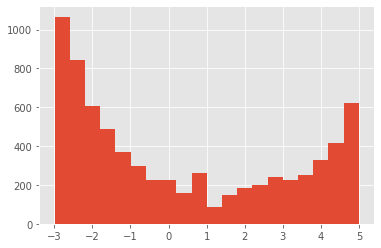

In [174]:
#Rating =1
s1 = ratings_filtered[ratings_filtered['rating']==1].scaled_sentiment
plt.hist(s1,20)

(array([332., 405., 604., 715., 641., 455., 339., 201.,  95.,  74.,  38.,
         27.,  10.,   9.,   3.,   4.,   0.,   0.,   2.,   1.]),
 array([1.   , 1.108, 1.216, 1.324, 1.432, 1.54 , 1.648, 1.756, 1.864,
        1.972, 2.08 , 2.188, 2.296, 2.404, 2.512, 2.62 , 2.728, 2.836,
        2.944, 3.052, 3.16 ]),
 <a list of 20 Patch objects>)

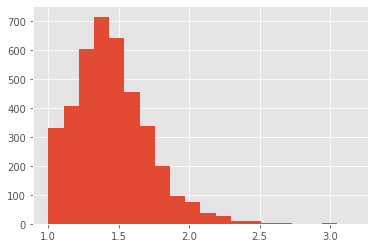

In [164]:
#Rating =2
s1 = ratings_filtered[ratings_filtered['rating']==2].scaled_sentiment
plt.hist(s1,20)

(array([186., 244., 453., 720., 814., 817., 706., 474., 355., 277., 139.,
        106.,  53.,  44.,  37.,  18.,   9.,   4.,   6.,   5.]),
 array([1.    , 1.1102, 1.2204, 1.3306, 1.4408, 1.551 , 1.6612, 1.7714,
        1.8816, 1.9918, 2.102 , 2.2122, 2.3224, 2.4326, 2.5428, 2.653 ,
        2.7632, 2.8734, 2.9836, 3.0938, 3.204 ]),
 <a list of 20 Patch objects>)

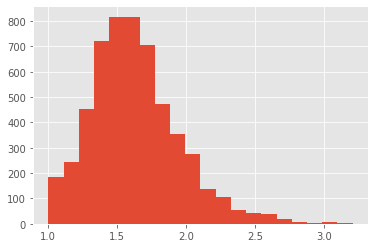

In [165]:
#Rating = 3
s1 = ratings_filtered[ratings_filtered['rating']==3].scaled_sentiment
plt.hist(s1,20)

(array([1.820e+02, 3.330e+02, 9.680e+02, 1.763e+03, 2.045e+03, 1.801e+03,
        1.389e+03, 9.390e+02, 5.840e+02, 4.100e+02, 2.440e+02, 2.000e+02,
        8.500e+01, 6.100e+01, 2.700e+01, 2.100e+01, 6.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00]),
 array([1.  , 1.16, 1.32, 1.48, 1.64, 1.8 , 1.96, 2.12, 2.28, 2.44, 2.6 ,
        2.76, 2.92, 3.08, 3.24, 3.4 , 3.56, 3.72, 3.88, 4.04, 4.2 ]),
 <a list of 20 Patch objects>)

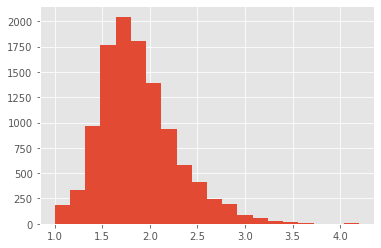

In [166]:
#Rating = 4
s1 = ratings_filtered[ratings_filtered['rating']==4].scaled_sentiment
plt.hist(s1,20)

(array([3.040e+02, 8.050e+02, 2.133e+03, 3.796e+03, 4.262e+03, 3.618e+03,
        2.773e+03, 1.858e+03, 1.198e+03, 7.340e+02, 4.080e+02, 2.380e+02,
        8.800e+01, 3.600e+01, 1.700e+01, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 20 Patch objects>)

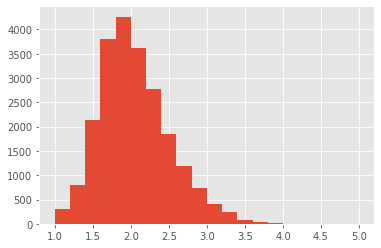

In [170]:
#Rating =5
s1 = ratings_filtered[ratings_filtered['rating']==5].scaled_sentiment
plt.hist(s1,20)